In [5]:
import os
import h5py
import mat73
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

pred_path = 'test_CH.h5'
real_path = 'CH_test_large.mat'
font = 14

params = {
    # 'legend.fontsize': 'large',
    # 'figure.figsize': (15, 5),
    # 'axes.labelsize': 'large',
    'axes.titlesize': font,
    # 'axes.titlesize': 'large',
     'xtick.labelsize': 'large',
     'ytick.labelsize': 'large',
    # 'axes.labelweight': 'bold',
    # 'axes.titleweight': 'bold',
    # 'figure.titleweight': 'bold',
    # 'font.weight': 'bold',
    'font.family': 'serif',
    'font.size': font,
    # 'axes.titlepad': 10
}
pylab.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
pylab.rcParams.update(params)


/export/scratch2/andong/Workspace/Python/test/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


shape of real (56, 160, 320)
shape of pred (56, 160, 320)


/export/scratch2/andong/Workspace/Python/test/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


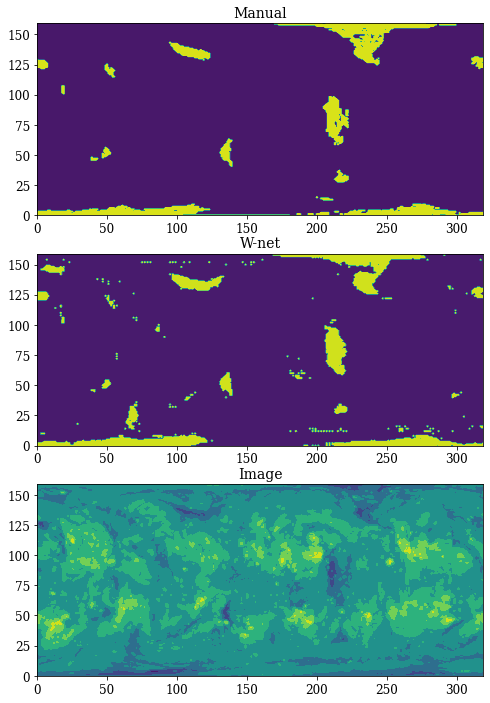

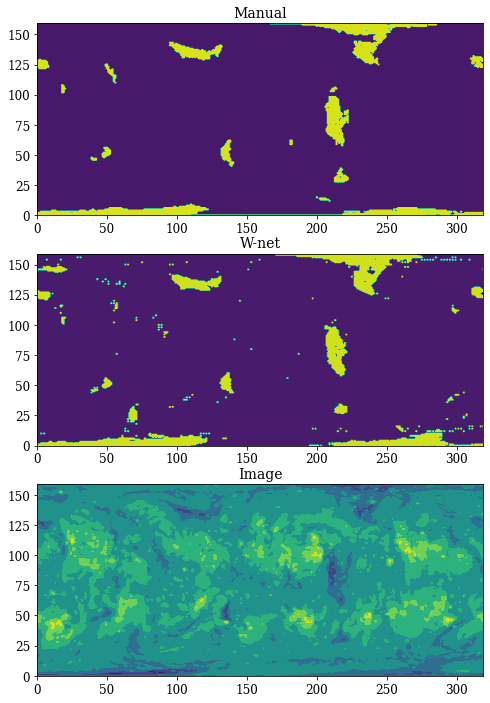

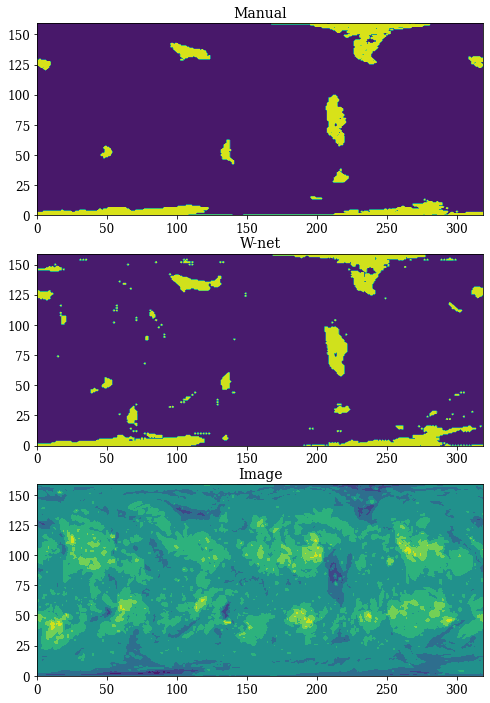

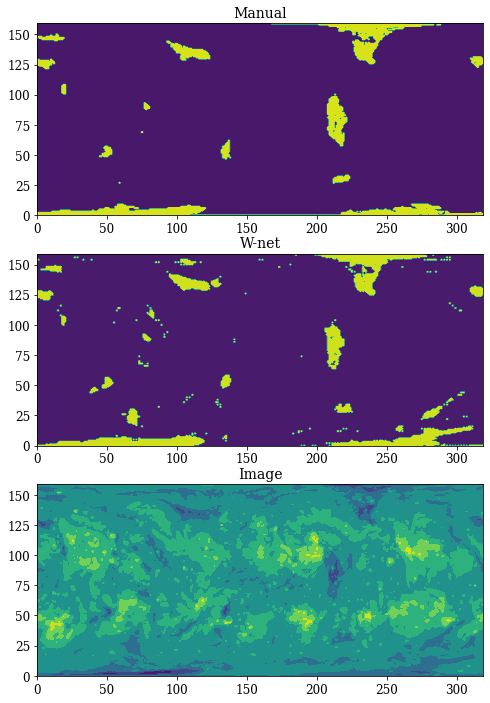

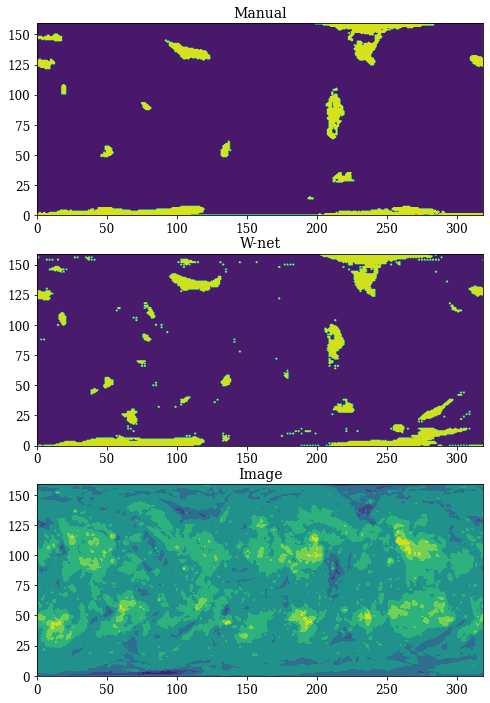

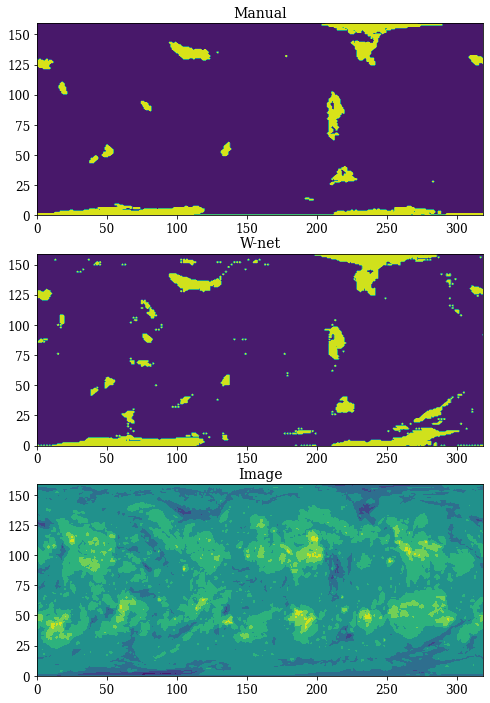

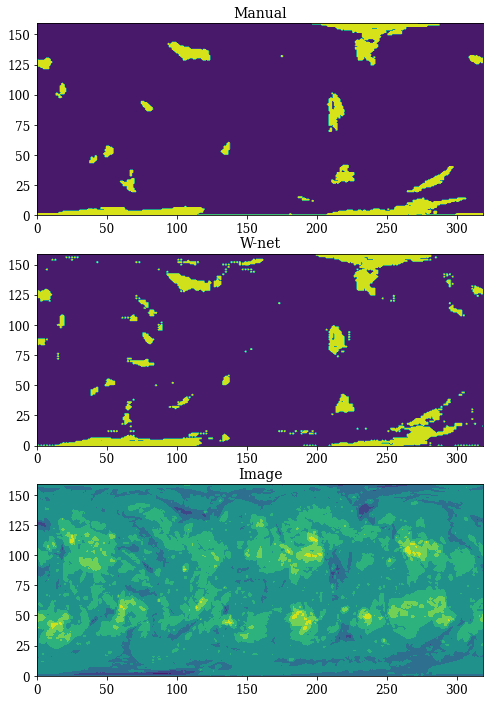

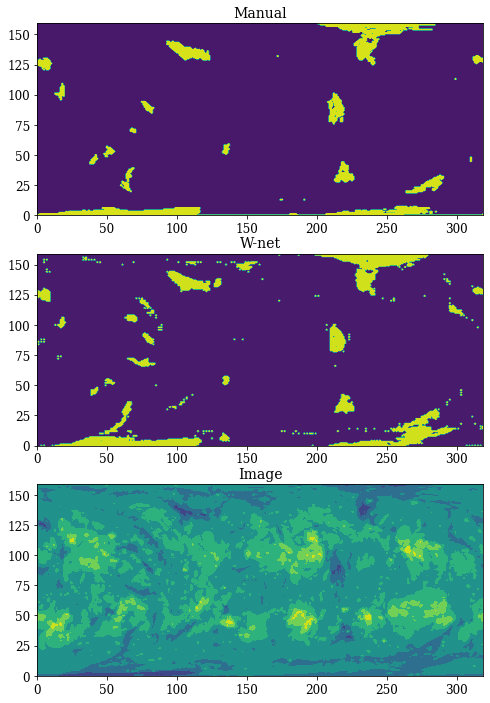

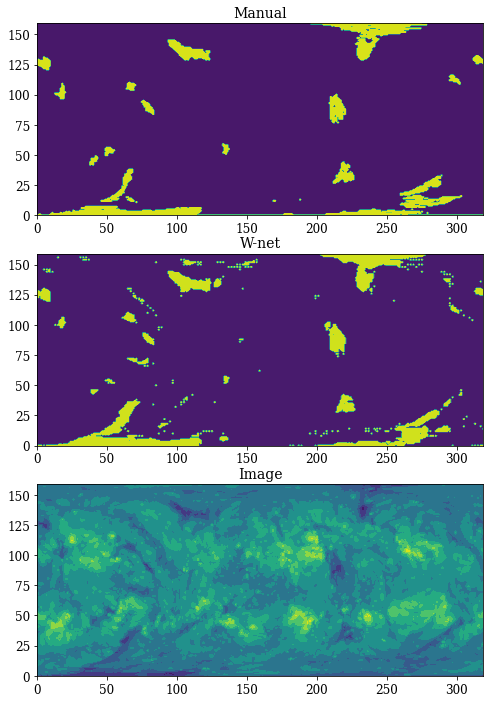

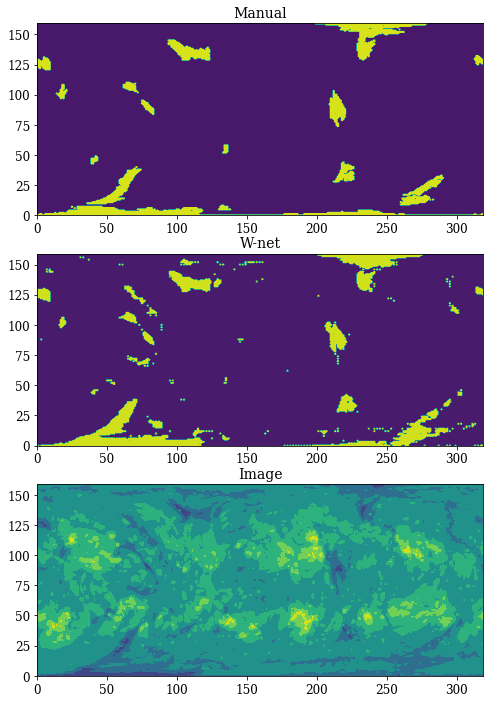

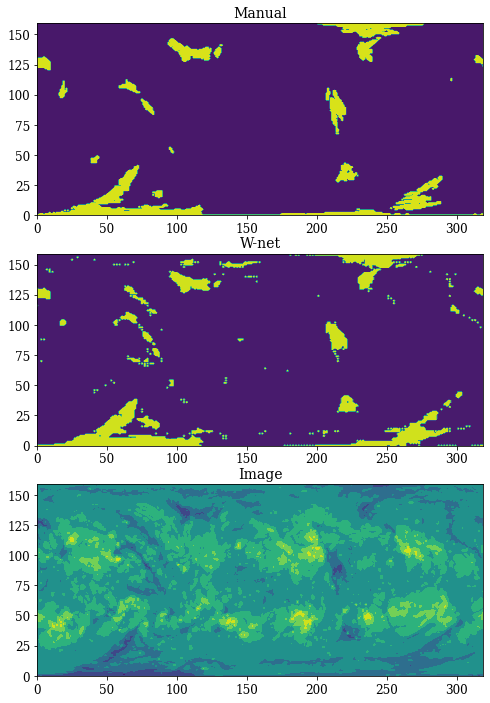

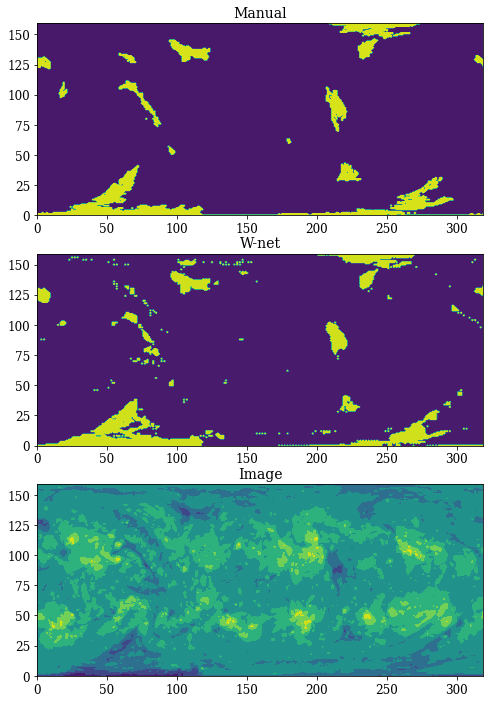

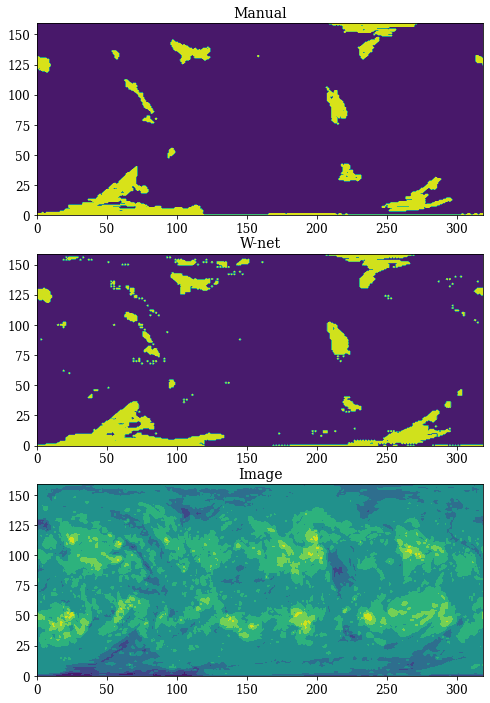

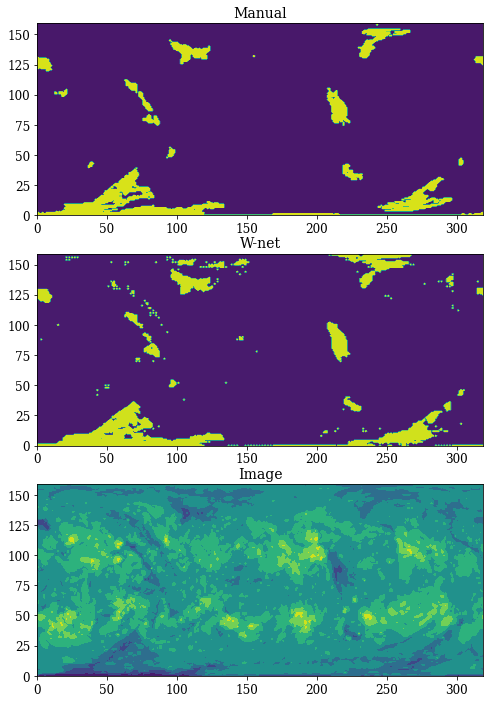

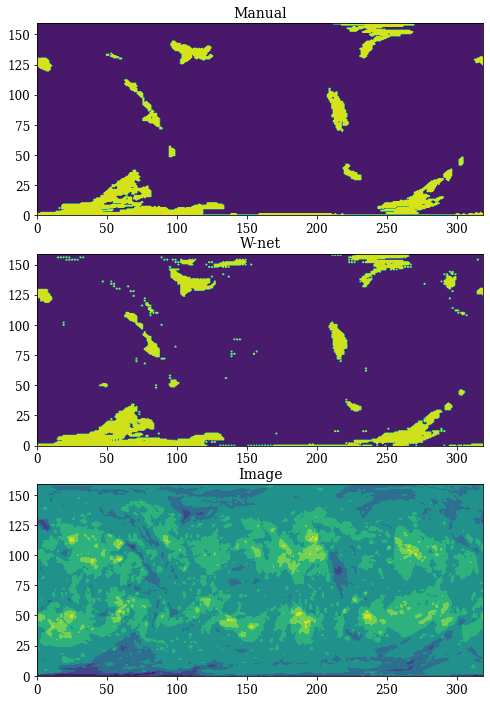

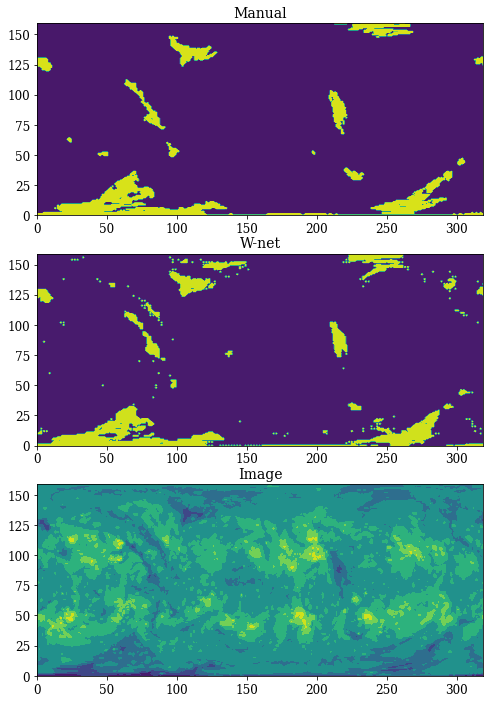

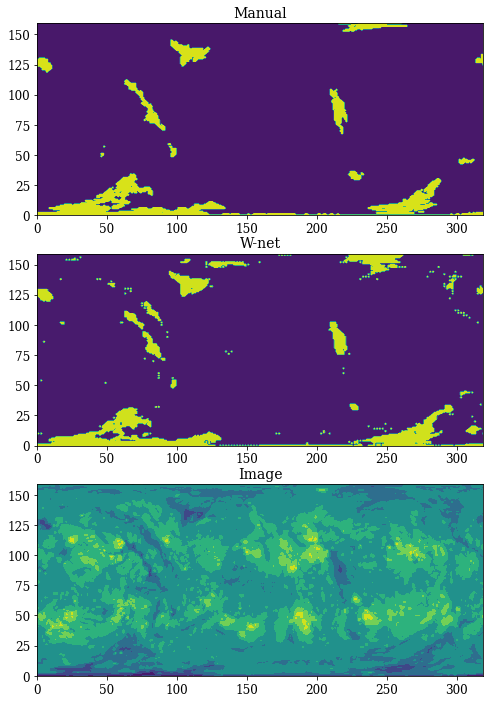

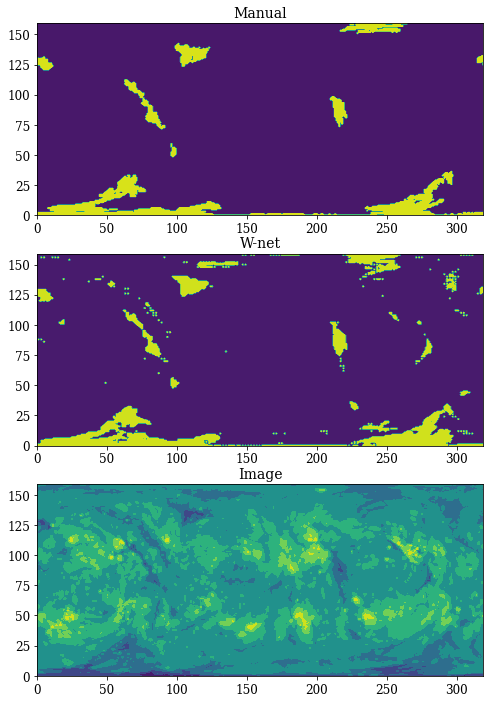

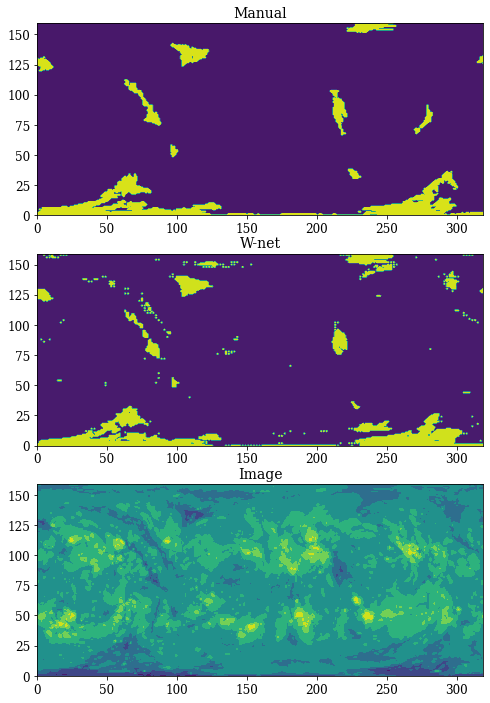

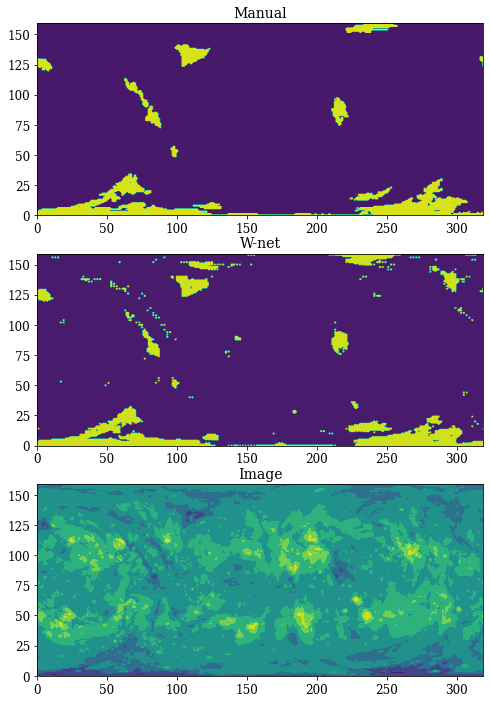

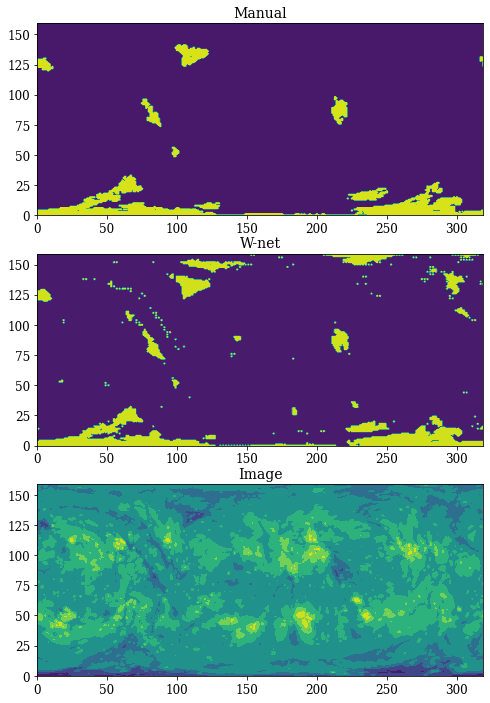

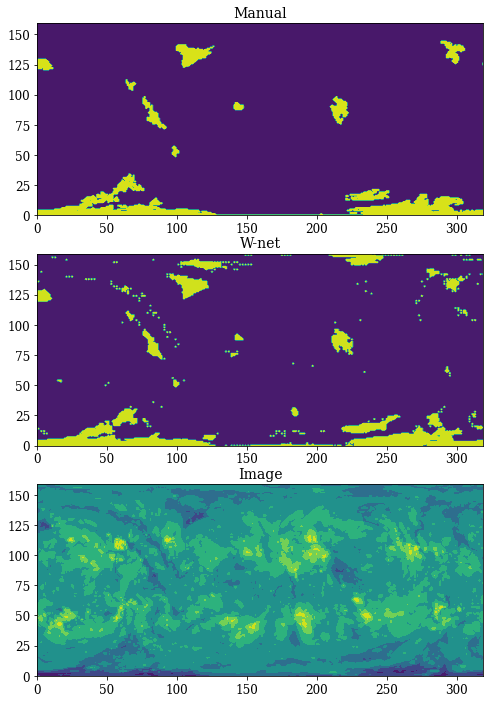

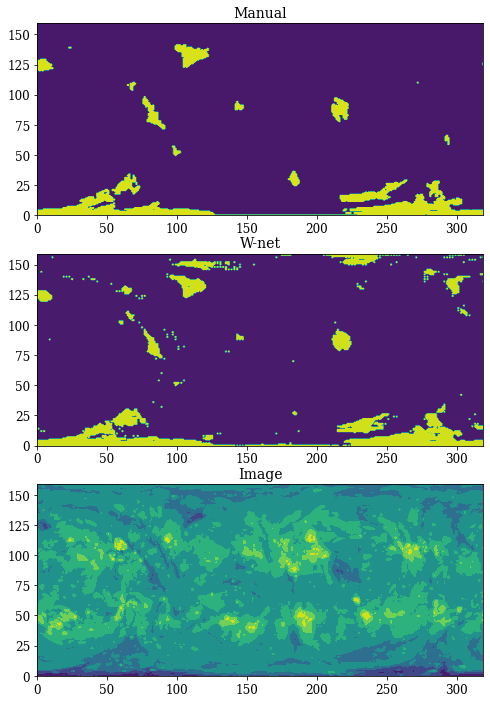

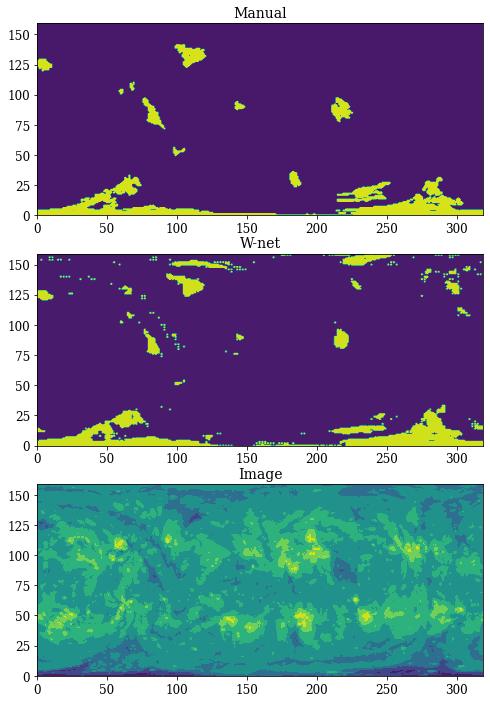

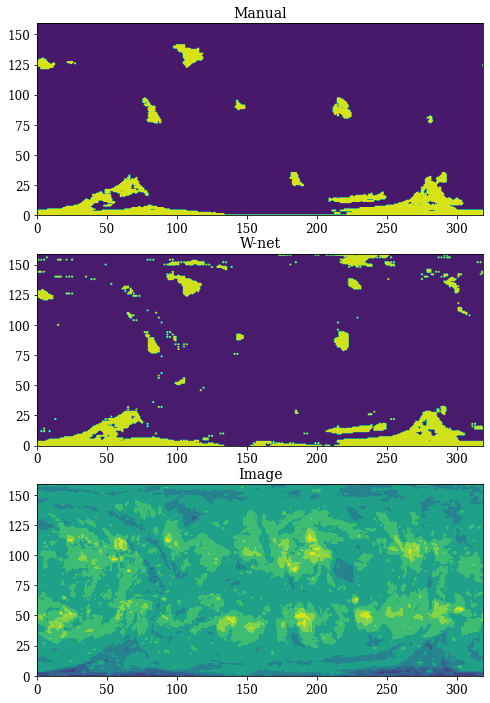

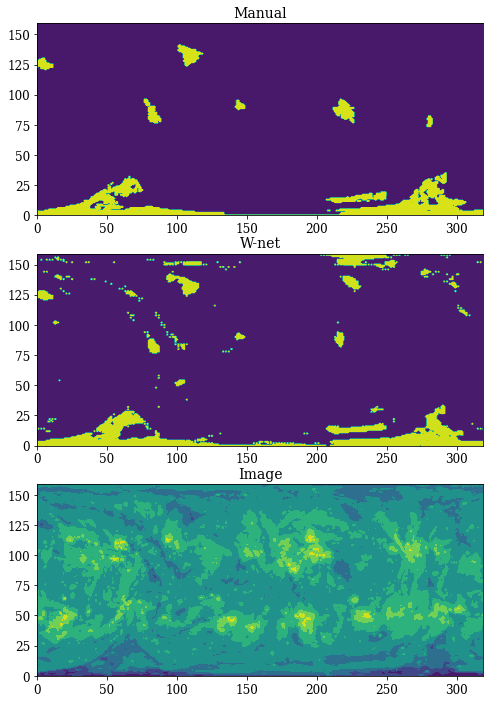

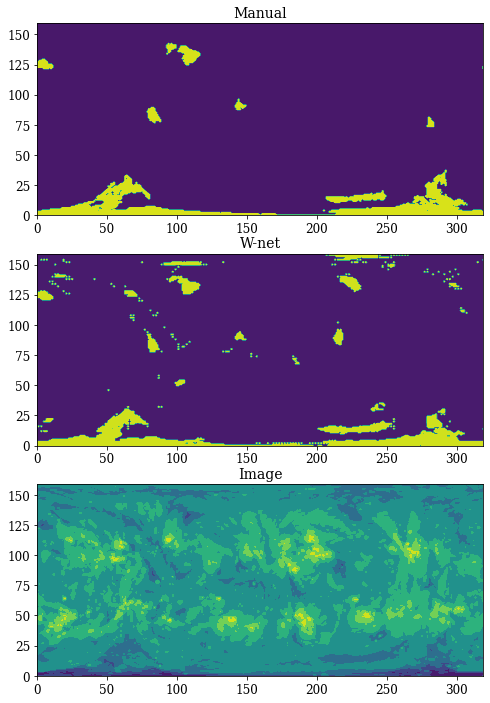

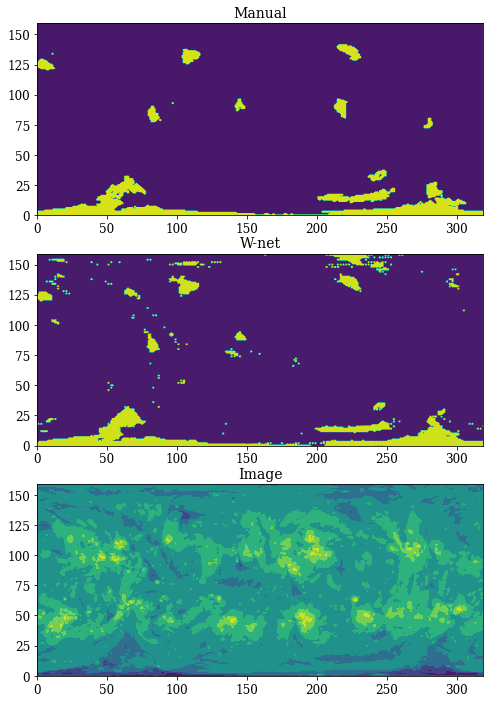

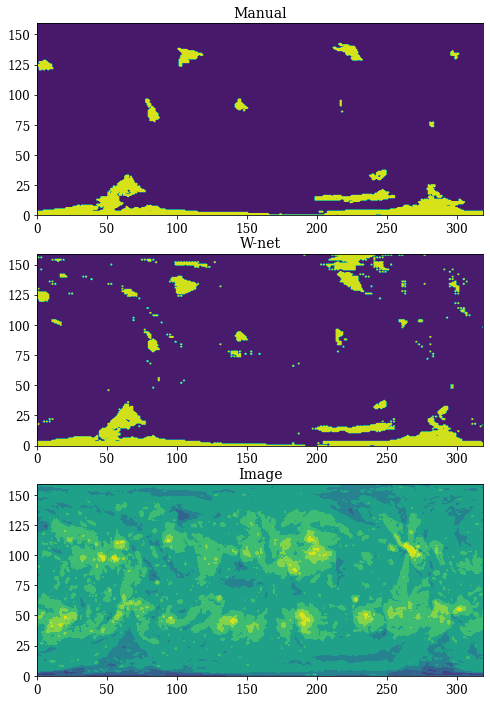

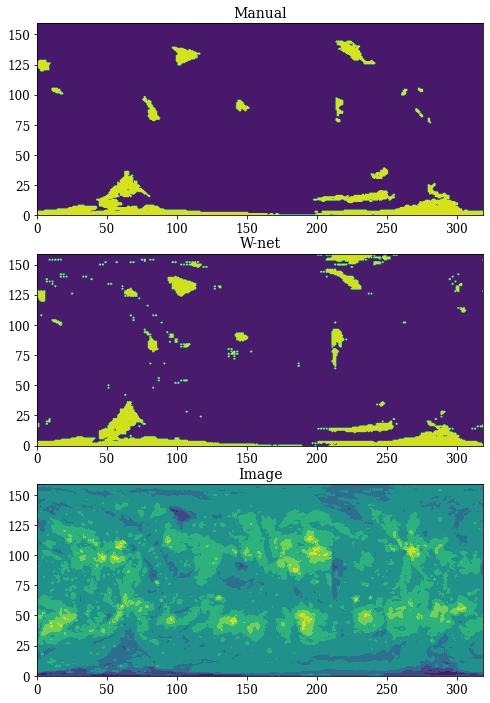

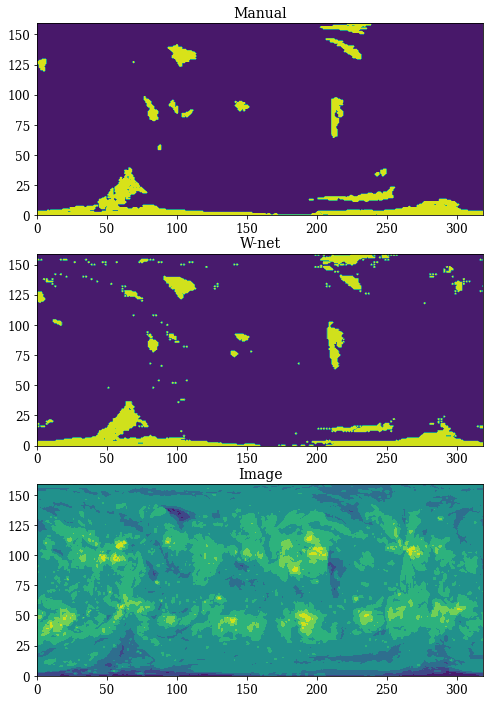

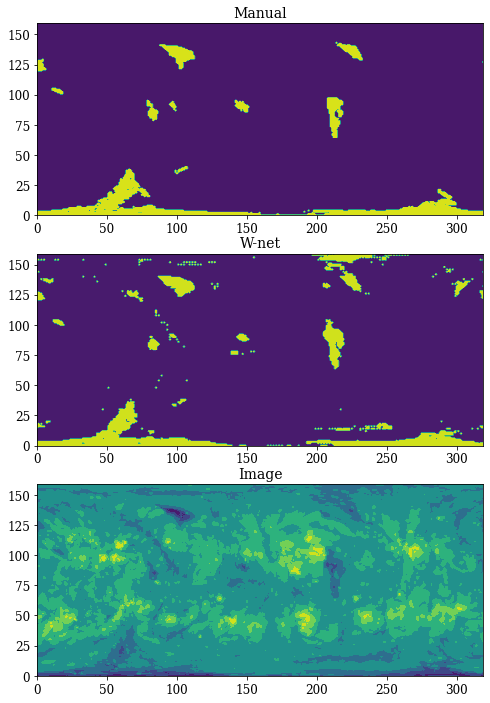

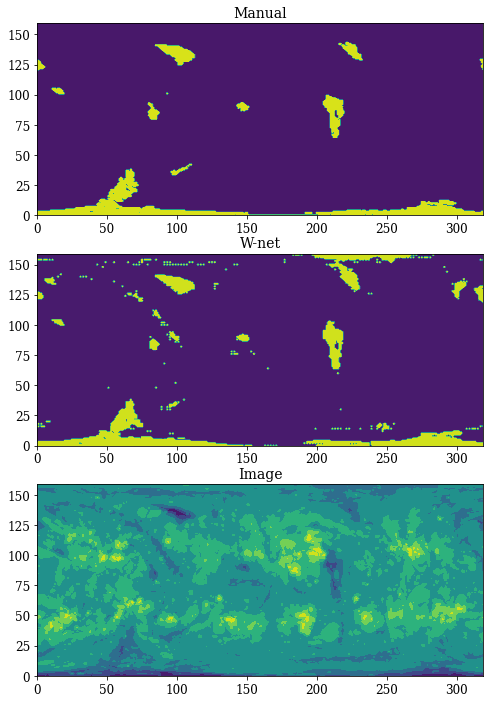

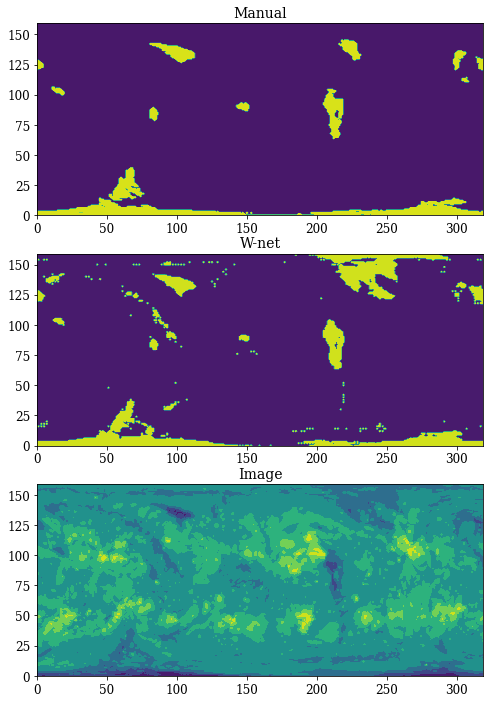

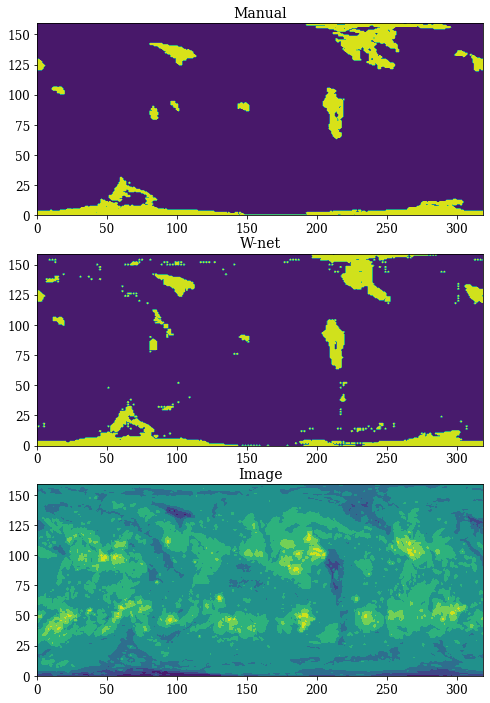

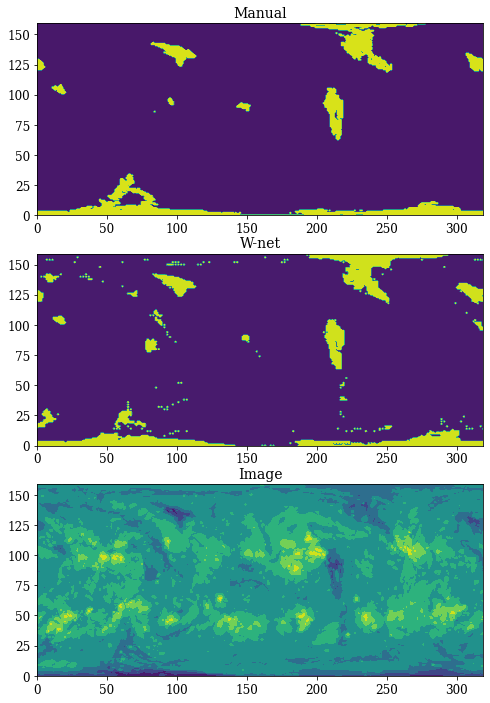

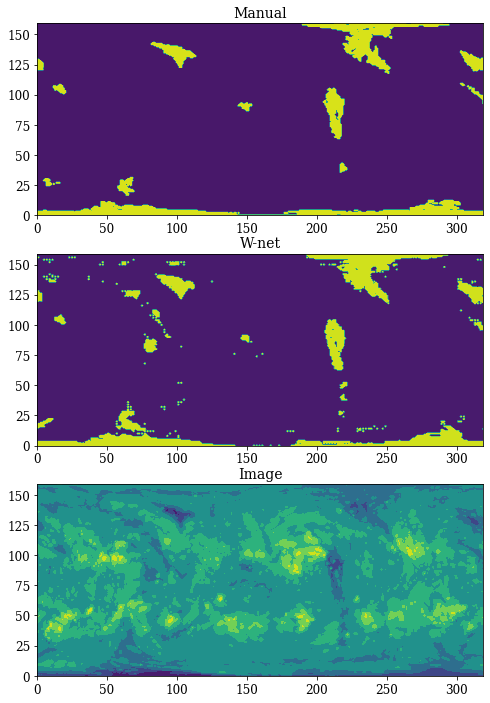

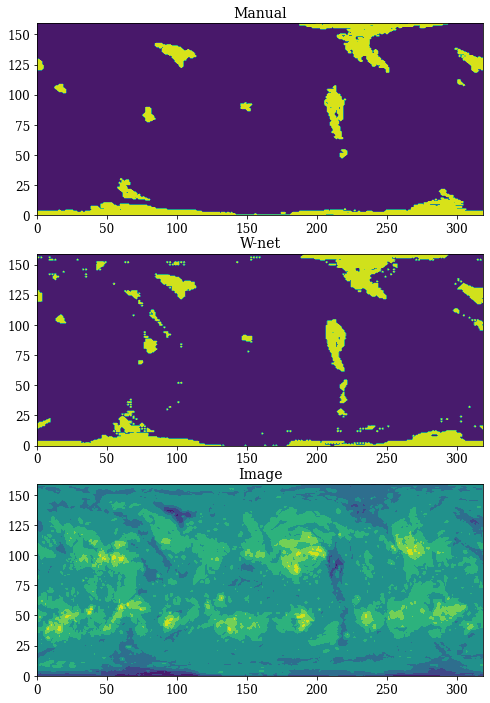

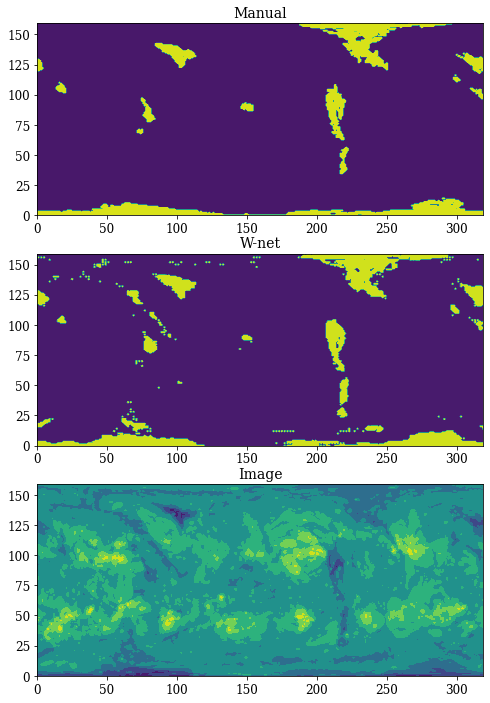

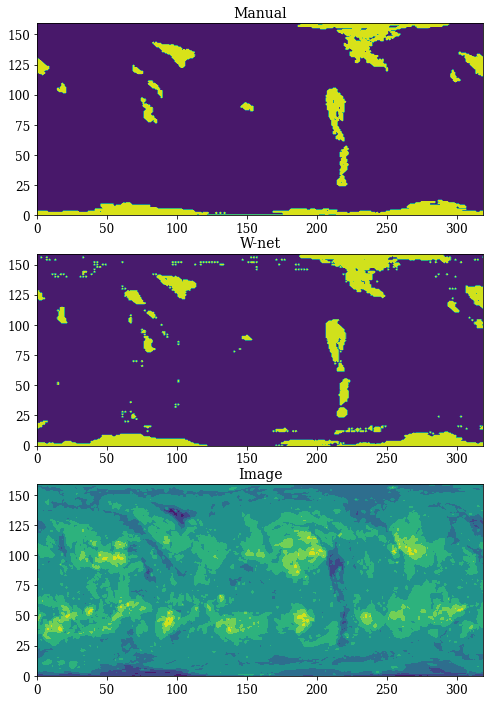

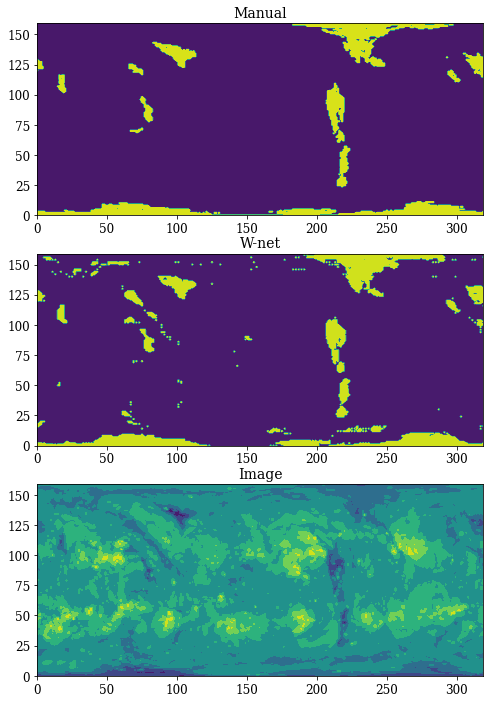

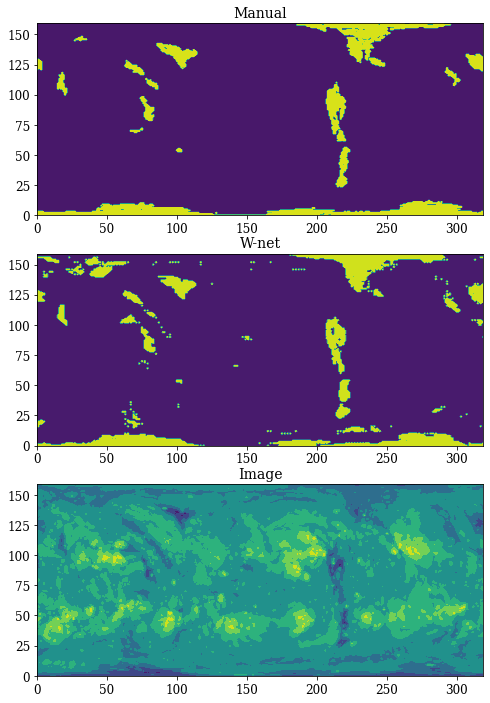

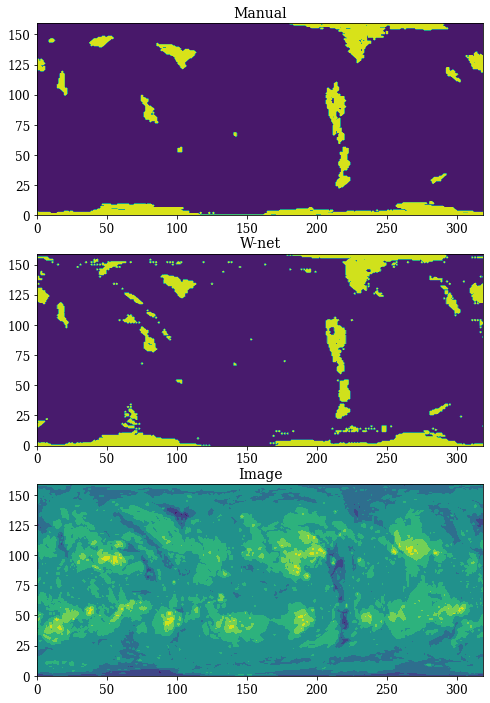

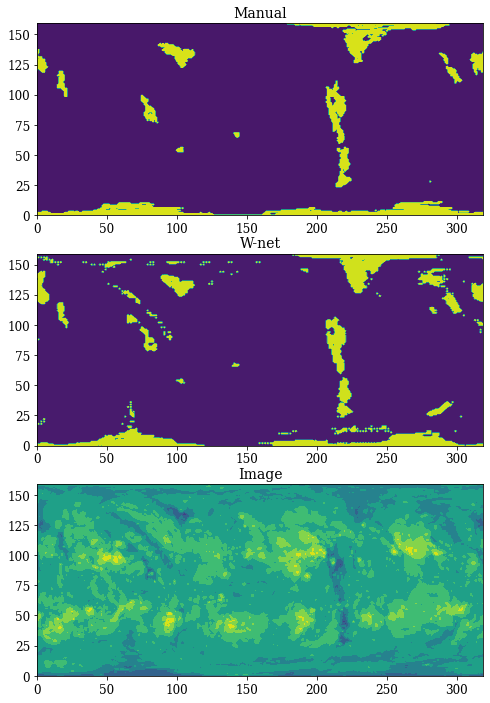

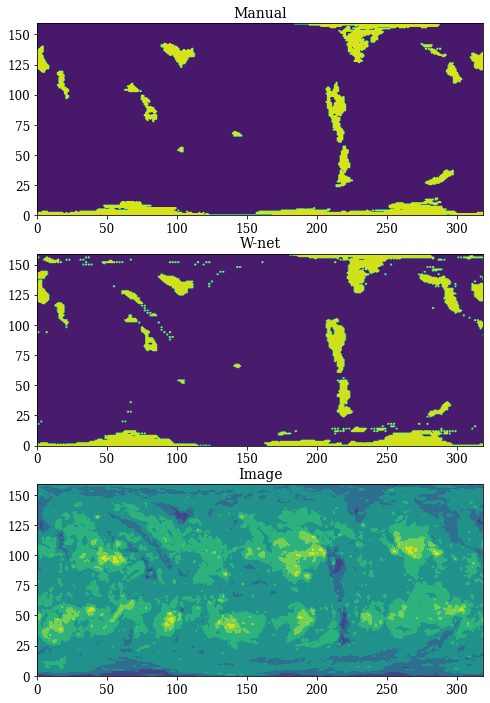

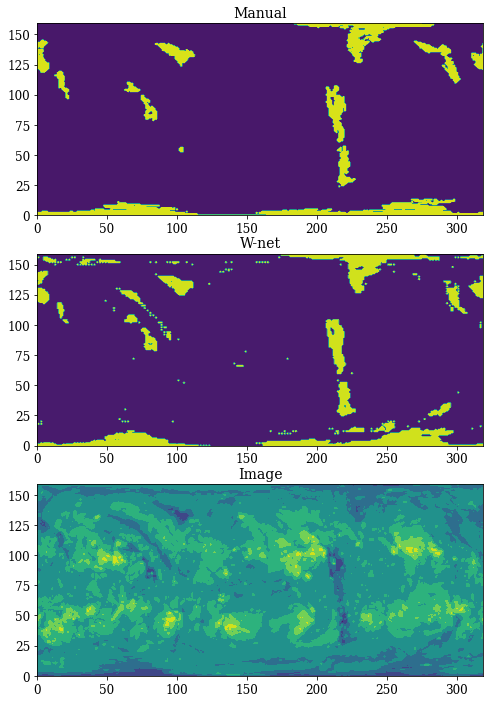

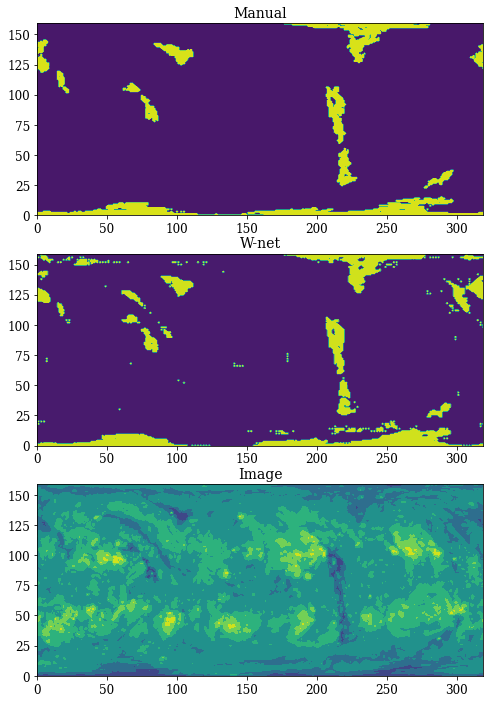

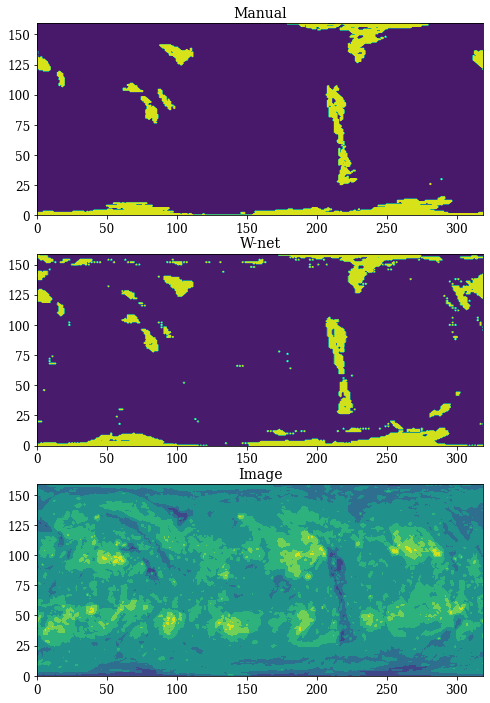

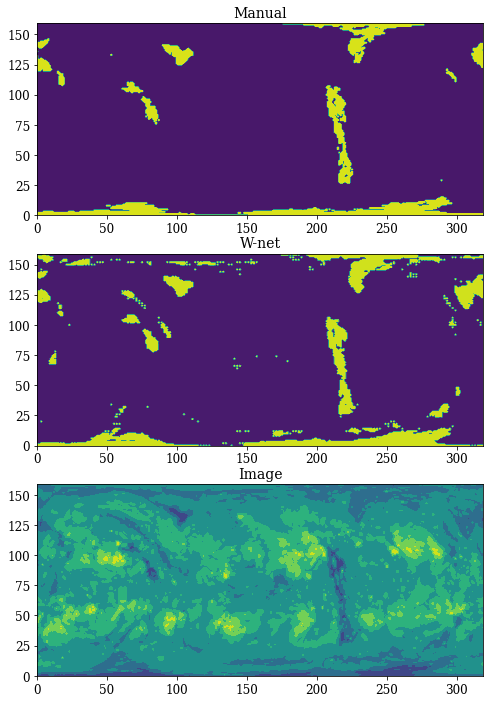

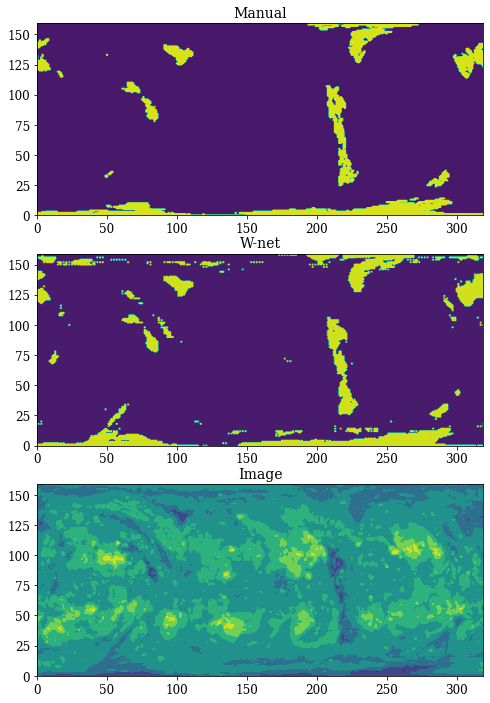

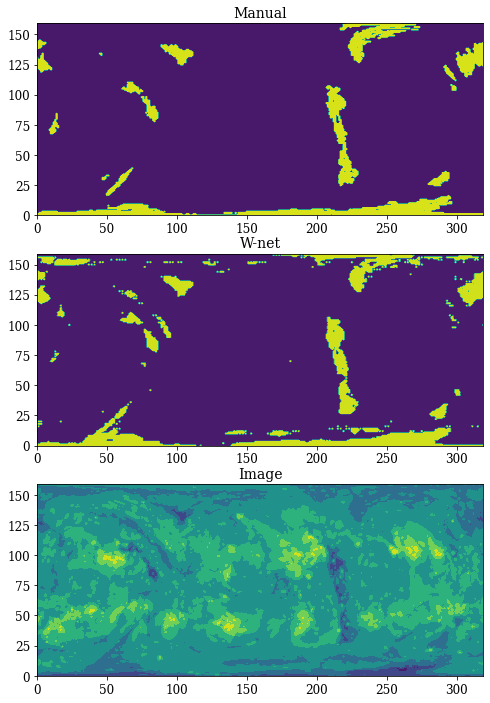

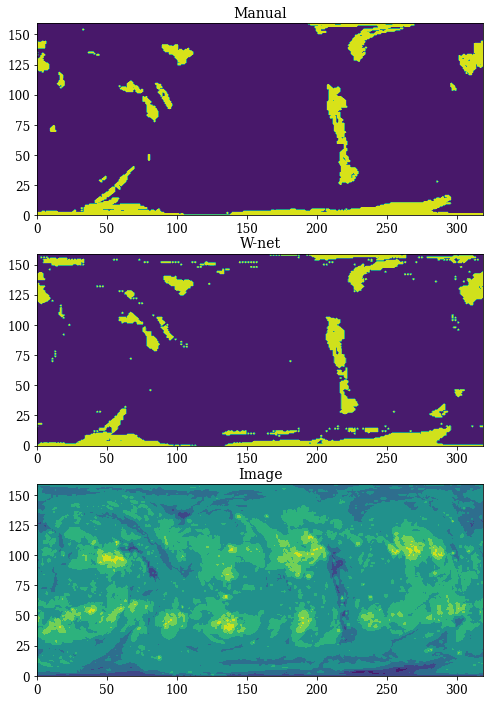

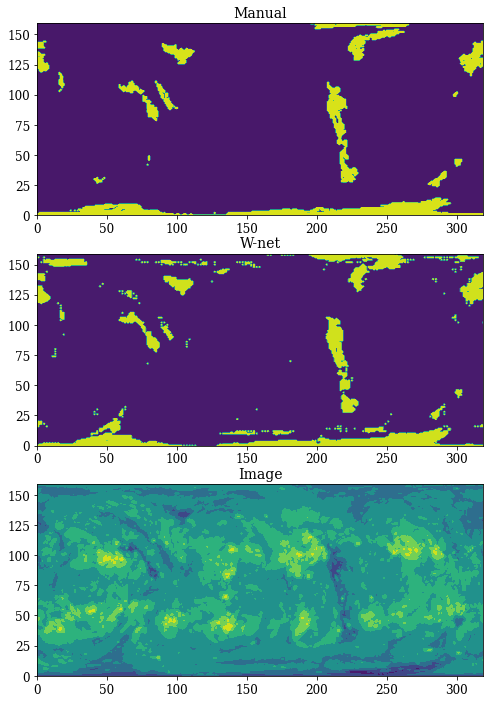

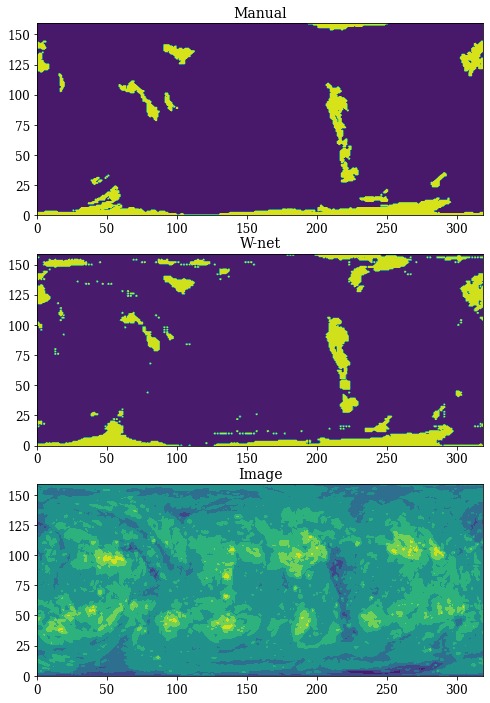

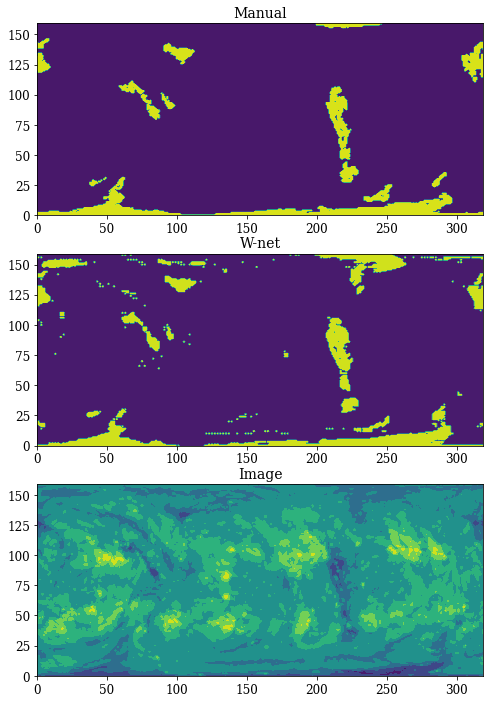

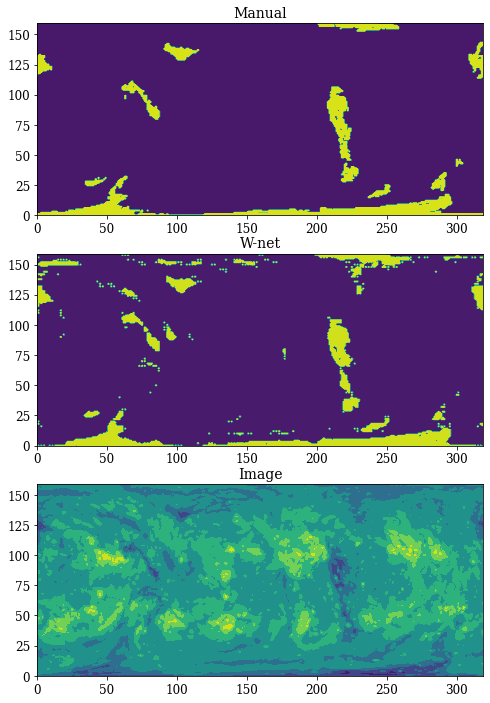

In [37]:
#### CHs comparison between Wnet and manually labelled
%matplotlib inline

########### real ############
d = mat73.loadmat(real_path)

real = np.array(d['X'])
print('shape of real', real.shape)
#CME = real[3]
idx_cme = np.where((real >0 ))
real[idx_cme] = 12


#plt.colorbar()

#plt.show()


########### pred ############

with h5py.File(pred_path, 'r') as f:
    
    image = np.array(f['origin'])
    Wnet = np.array(f['Wnet'])
    Wnet_CRF = np.array(f['Wnet+CRF'])
    f.close()
    
pred = Wnet

    
print('shape of pred', pred.shape)
#import ipdb; ipdb.set_trace()
idx_noncme = np.where(pred !=5 )
pred[idx_noncme] = 0

for i in range(pred.shape[0]):
    #import ipdb; ipdb.set_trace()

    plt.figure(figsize=(8, 12))
    plt.subplot(3,1,1)
    plt.contourf(real[i])
    plt.title('Manual')
    plt.subplot(3,1,2)
    plt.contourf(pred[i])
    plt.title('W-net')
    plt.subplot(3,1,3)
    plt.contourf(image[i, 0])
    plt.title('Image')
    #plt.colorbar()

    #plt.show()
    name = 'Figs/CHs_'+str(i+2560)+'.eps'
    plt.savefig(name, bbox_inches='tight',
                format='eps')


shape of pred (56, 160, 320)


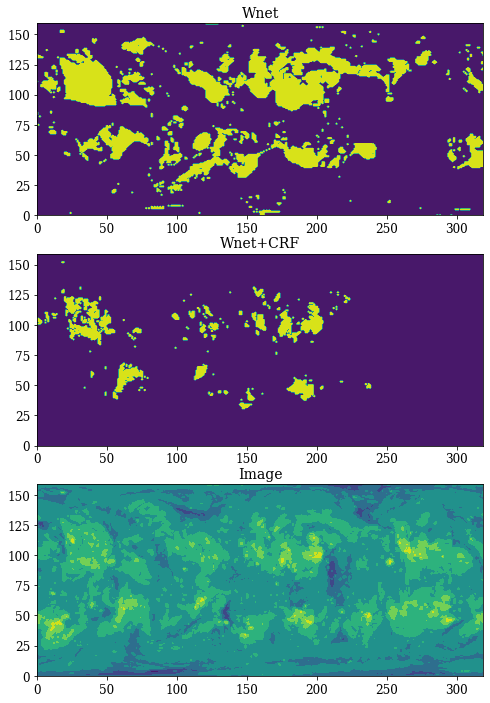

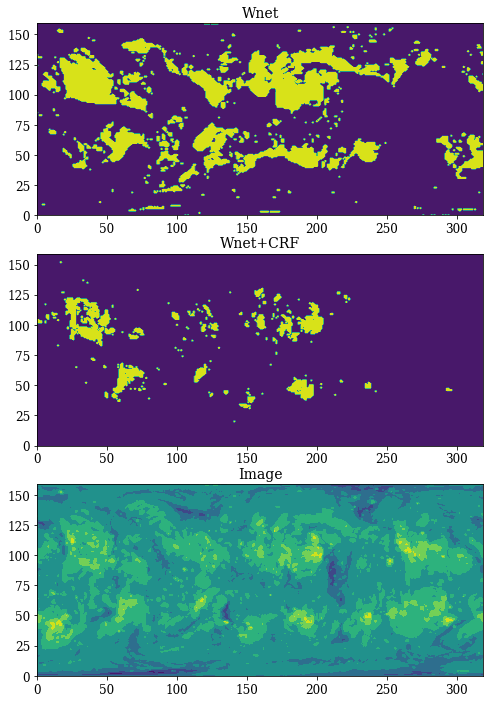

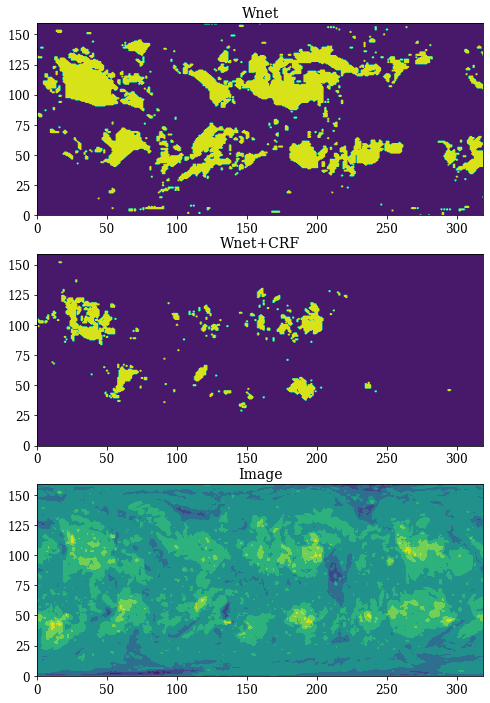

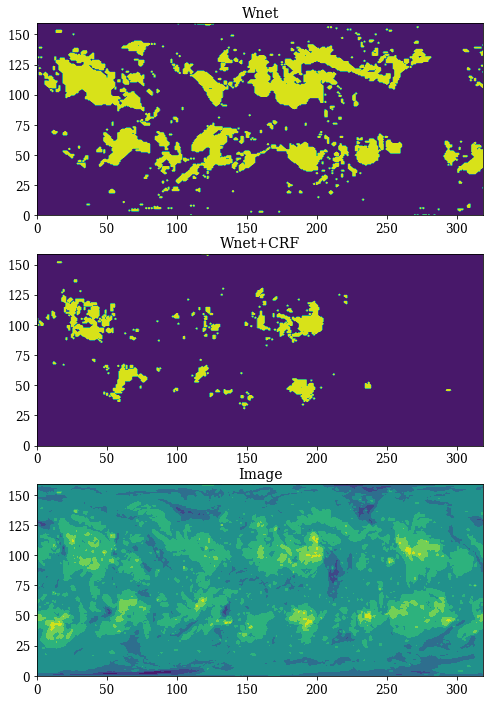

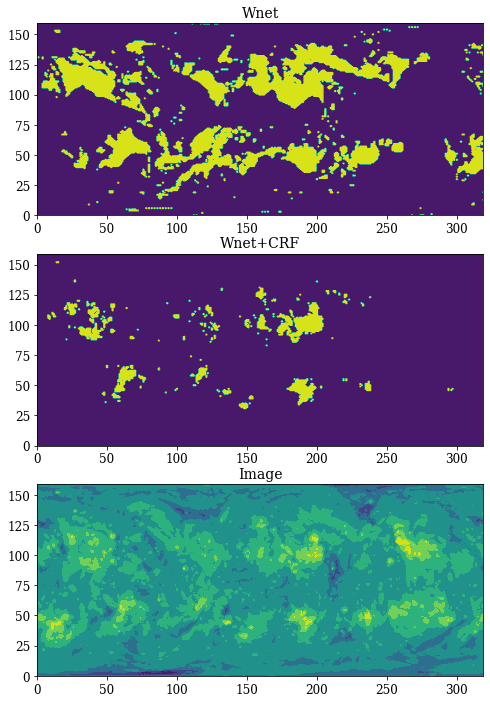

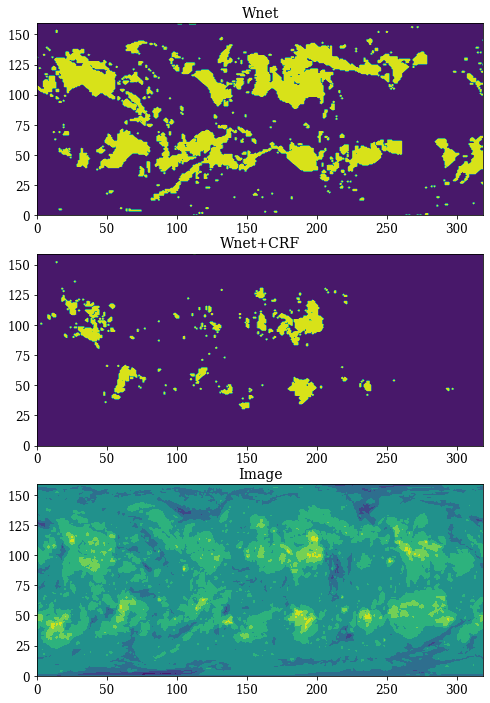

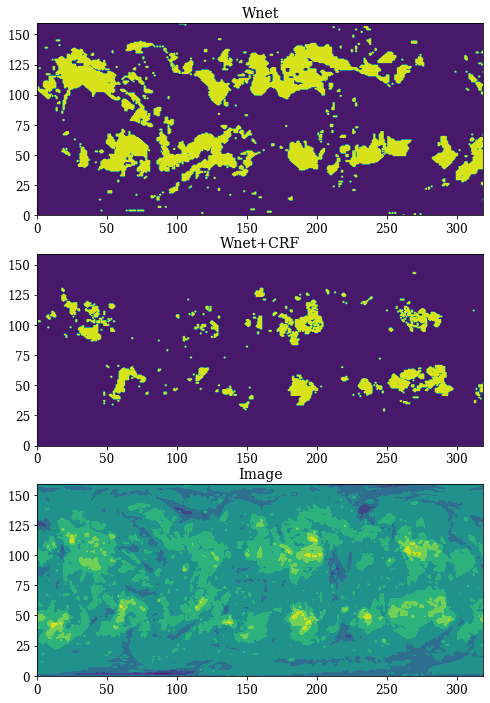

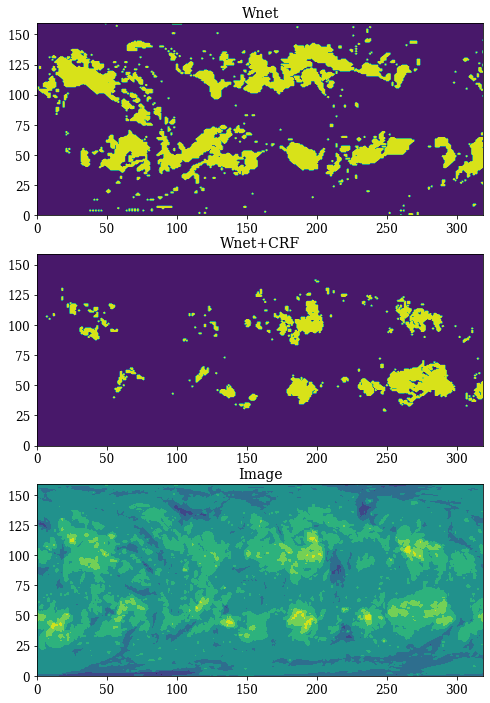

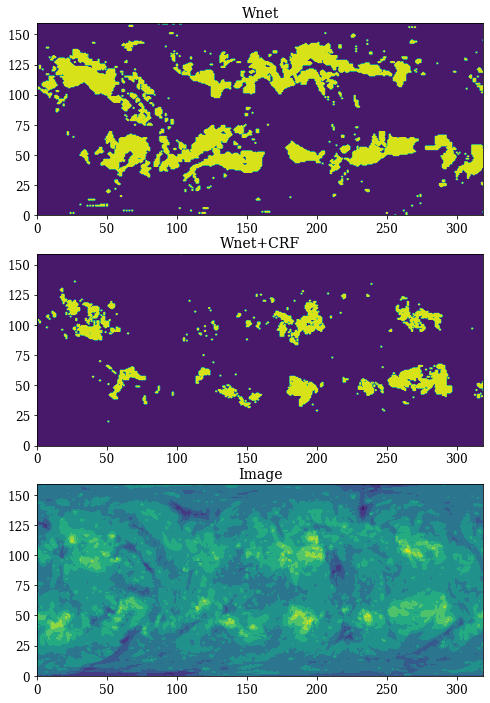

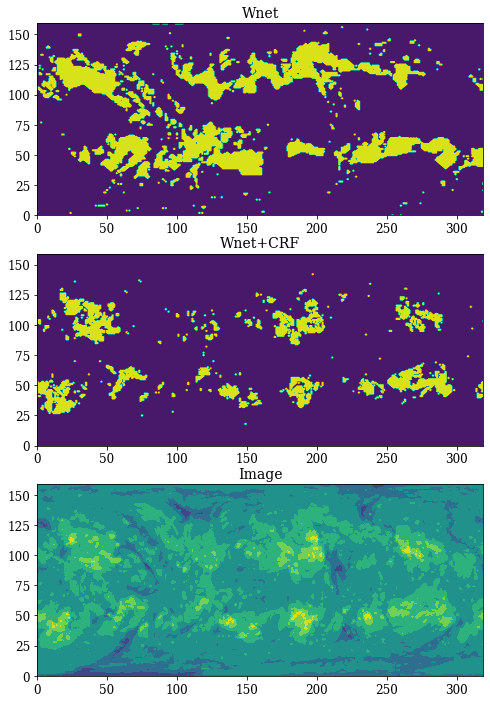

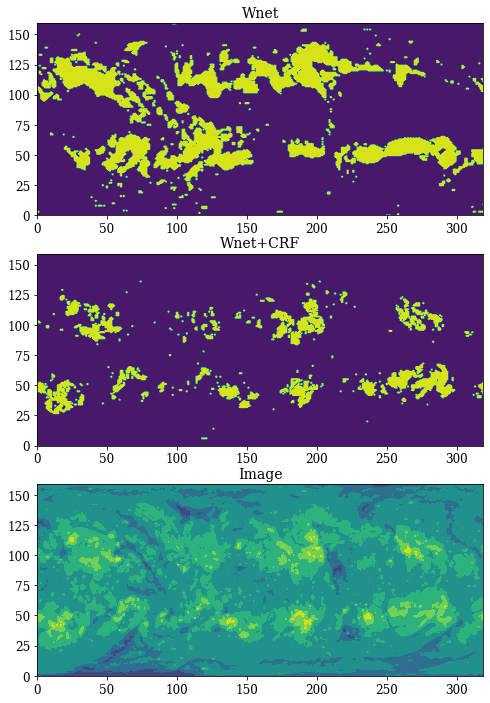

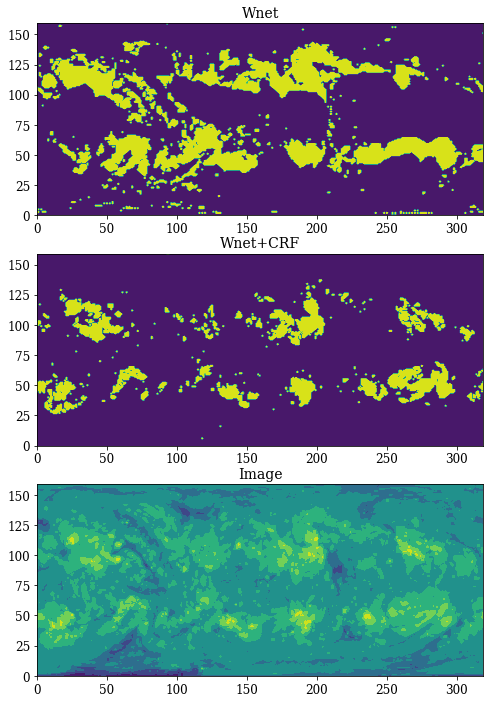

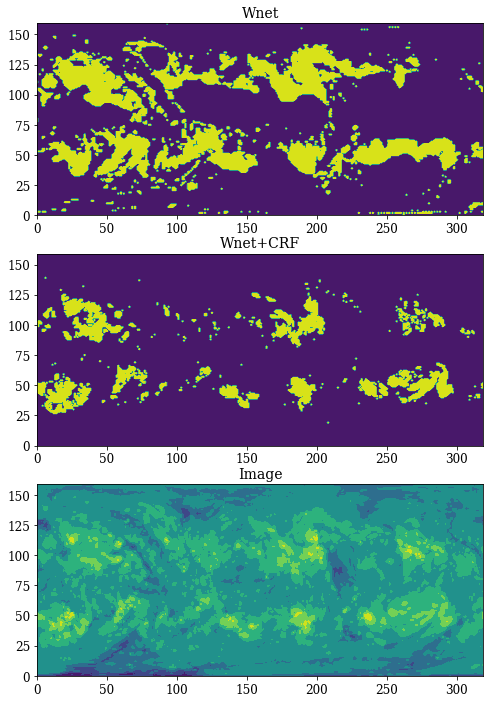

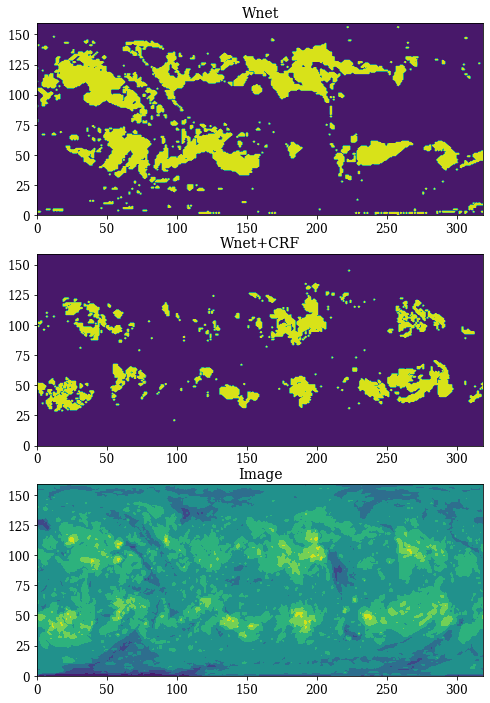

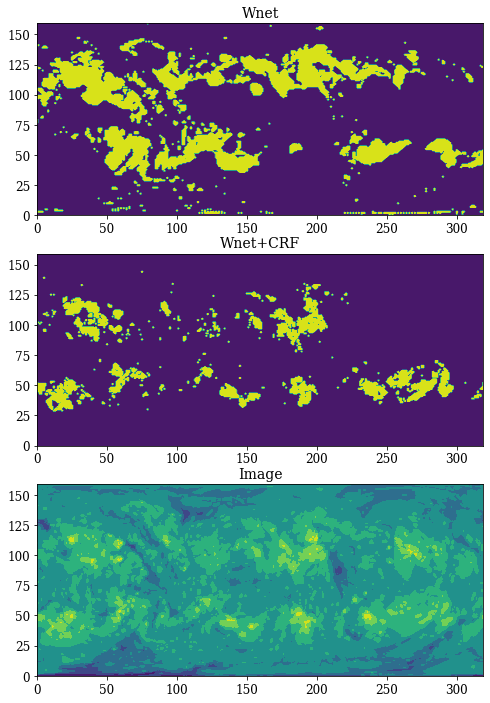

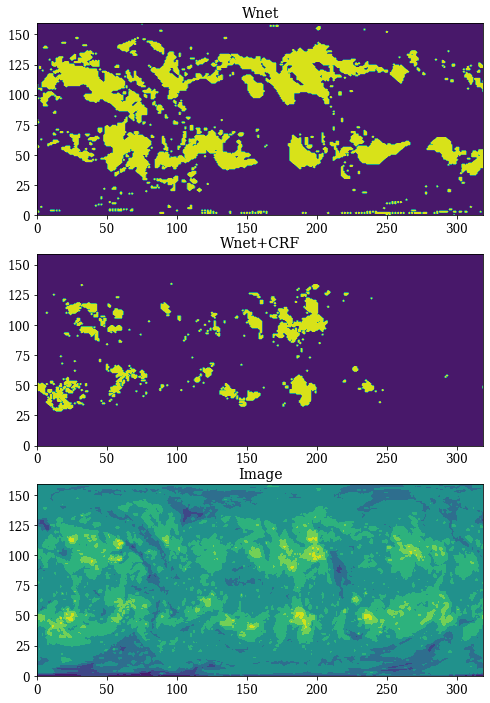

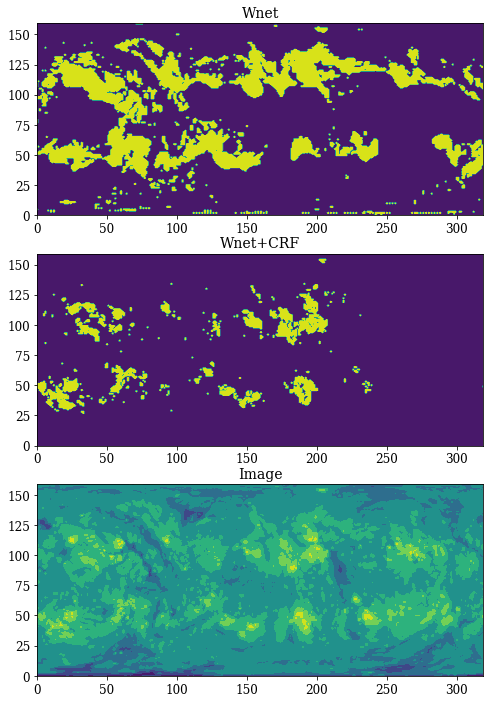

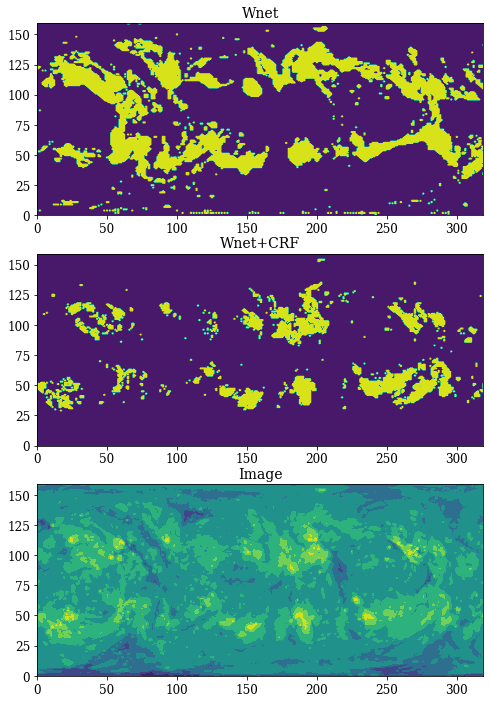

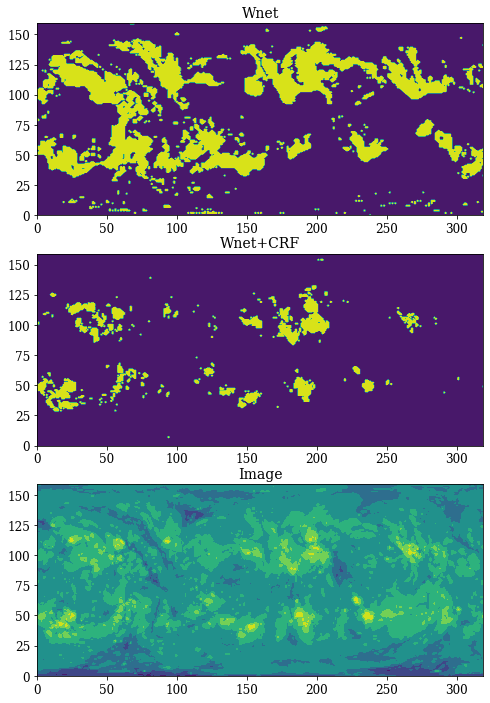

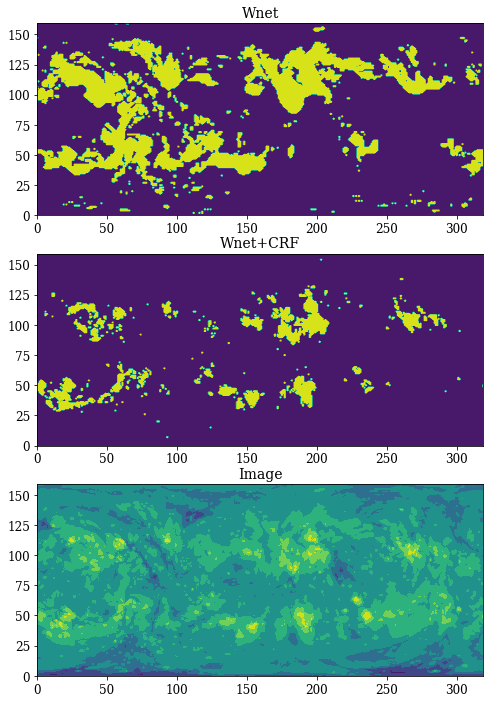

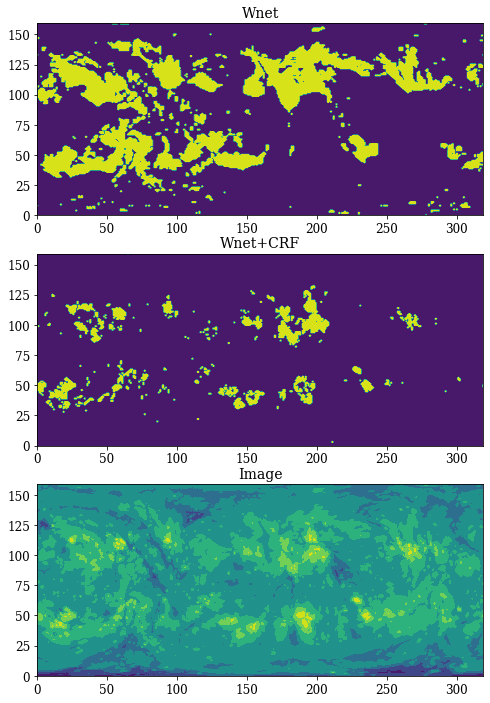

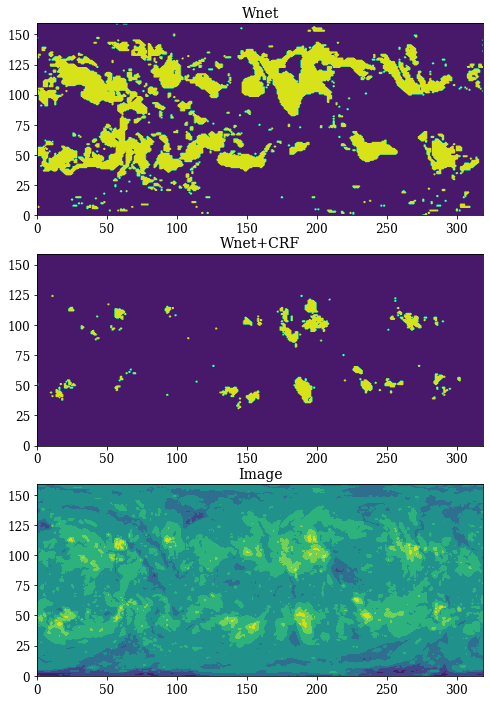

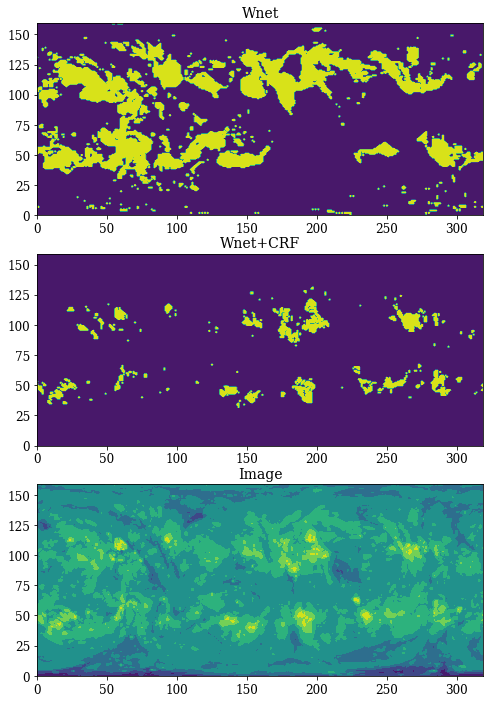

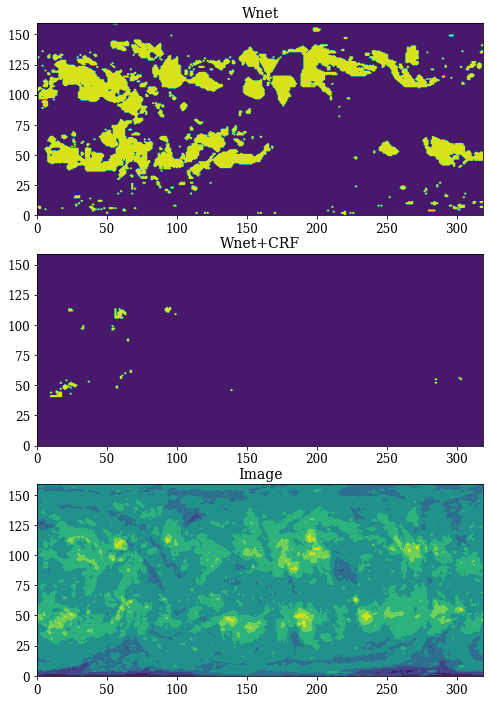

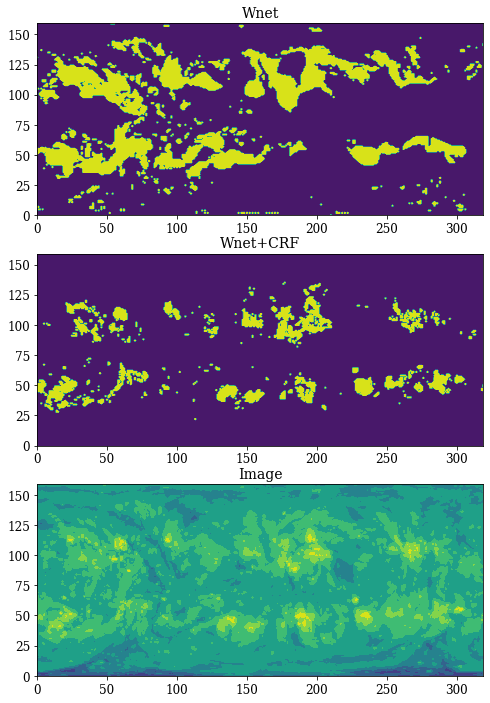

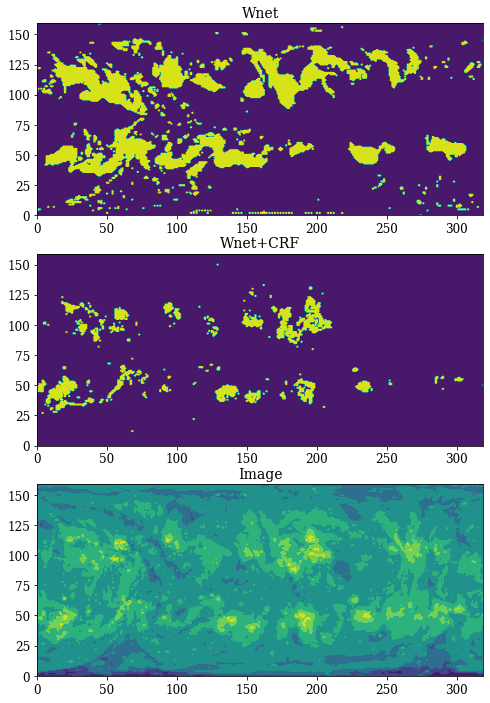

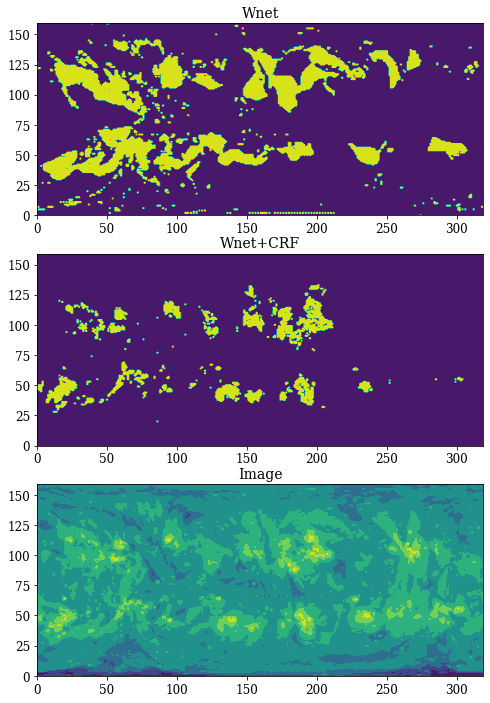

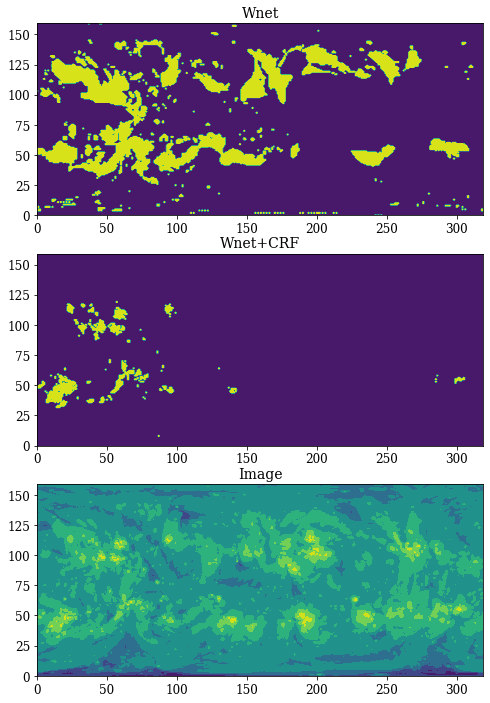

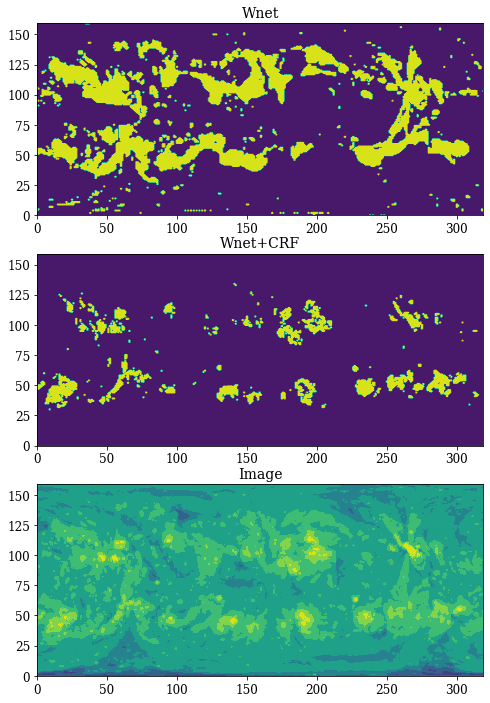

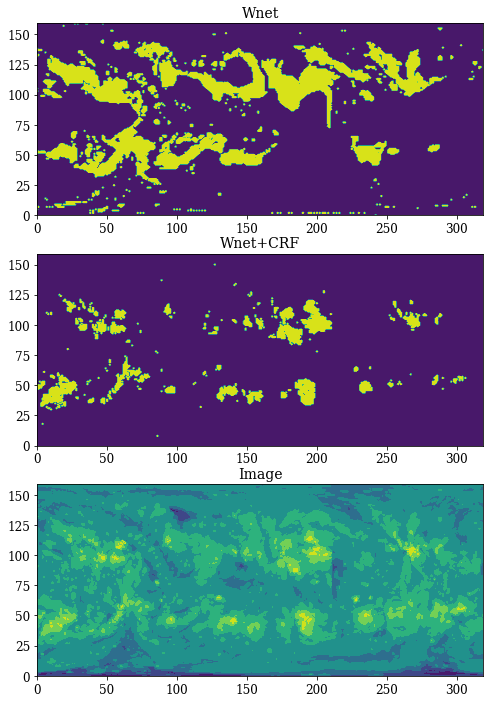

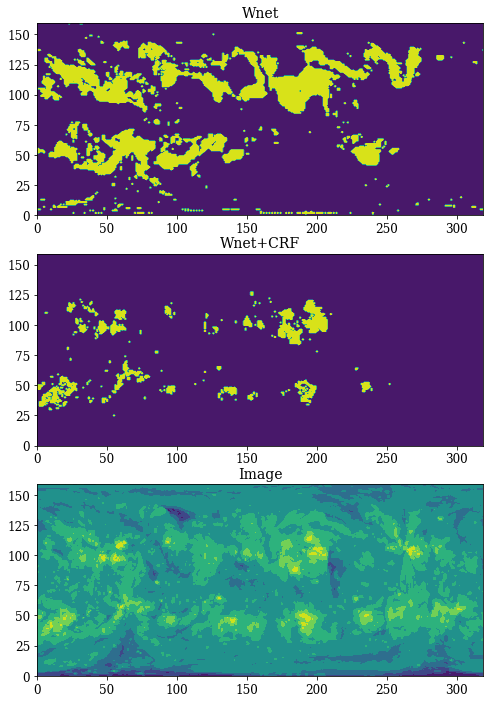

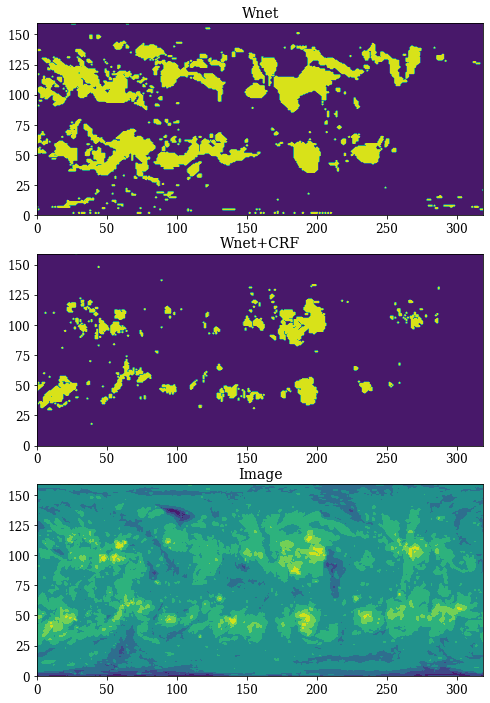

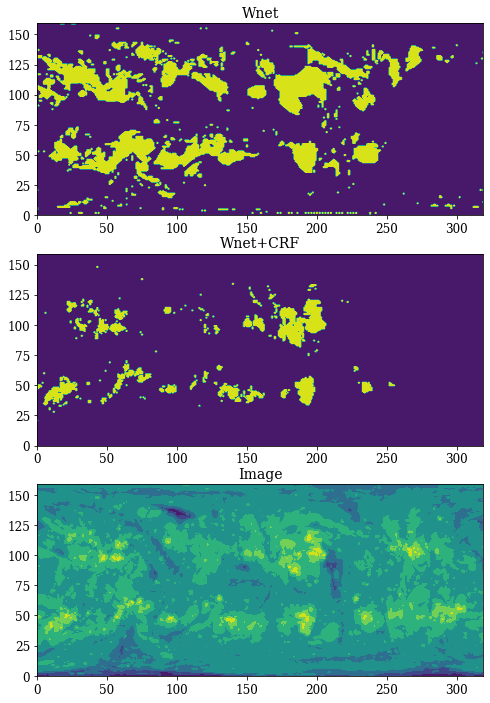

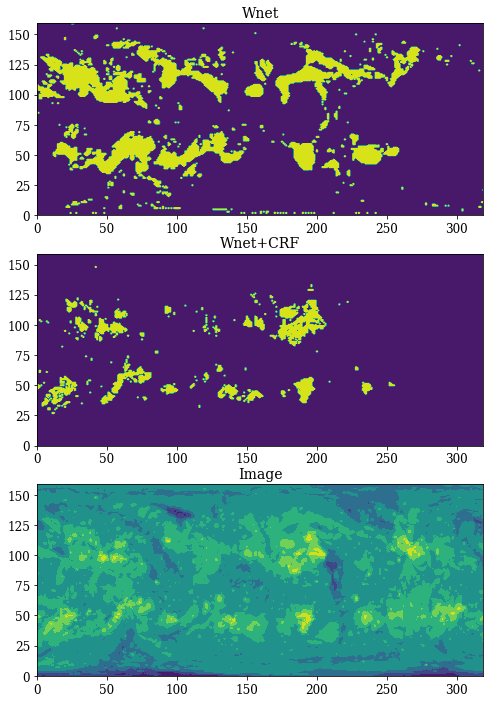

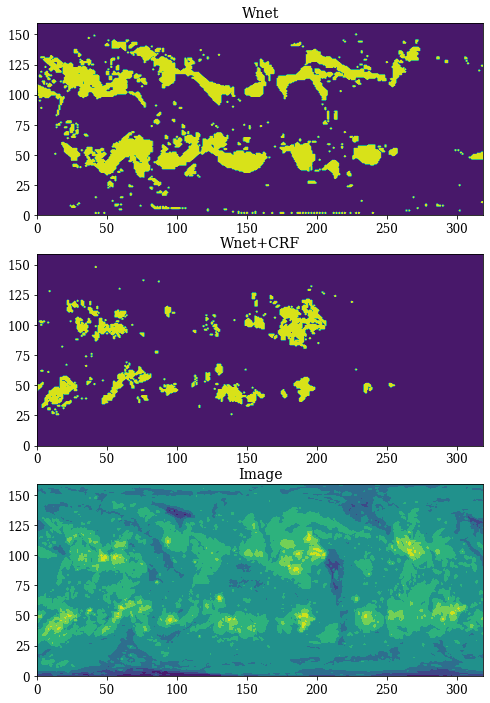

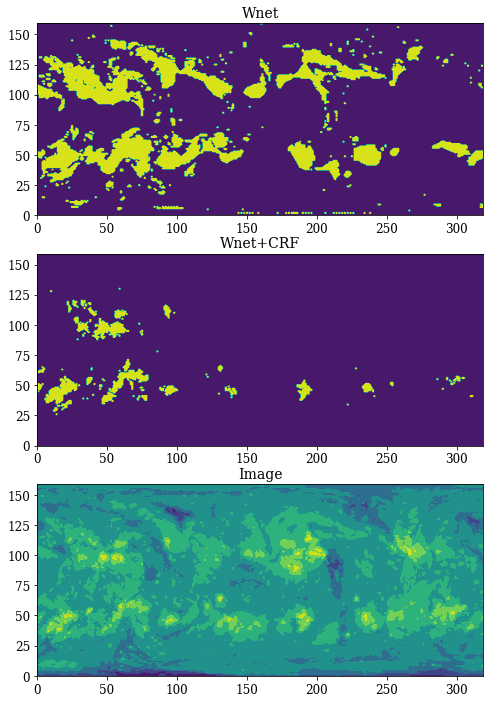

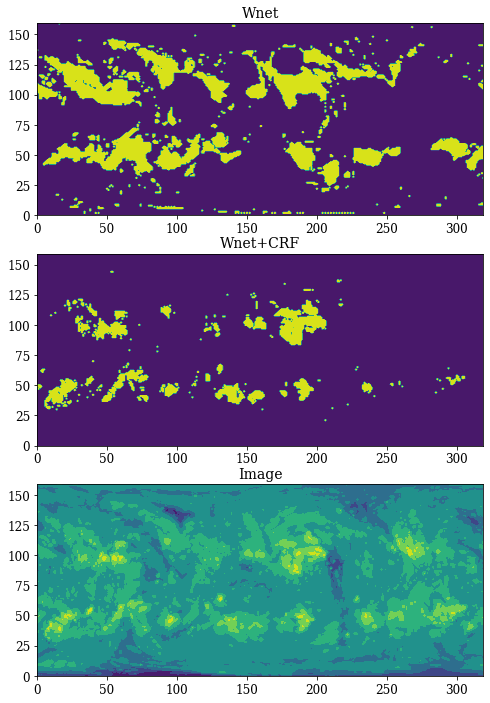

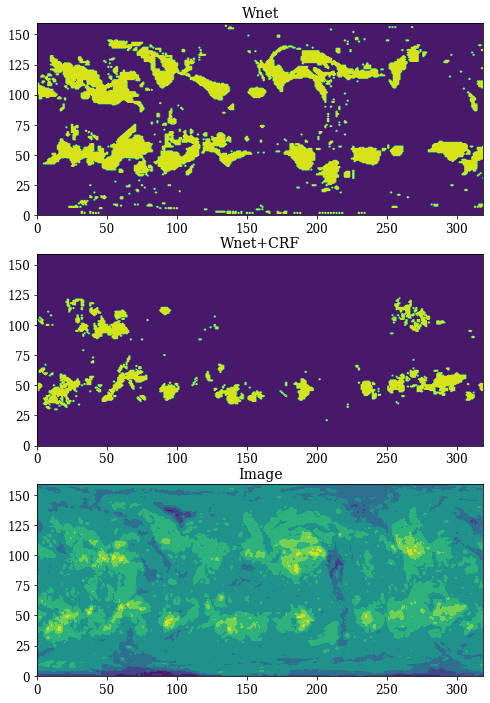

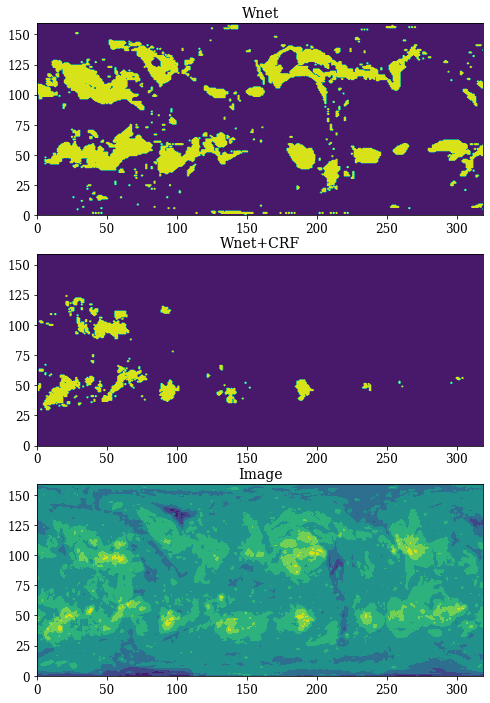

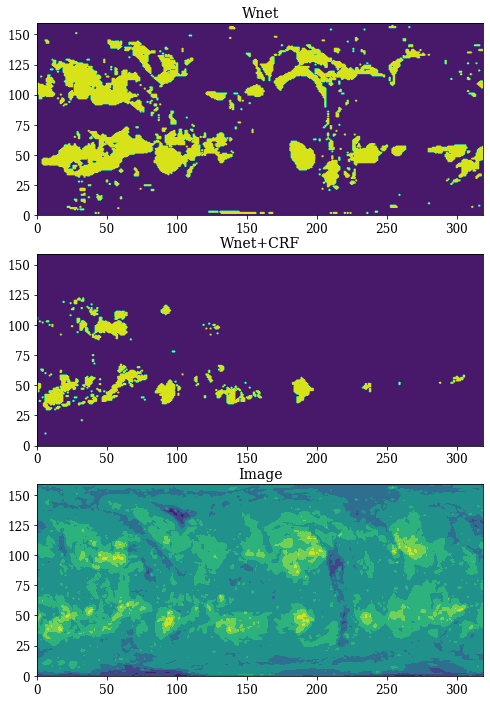

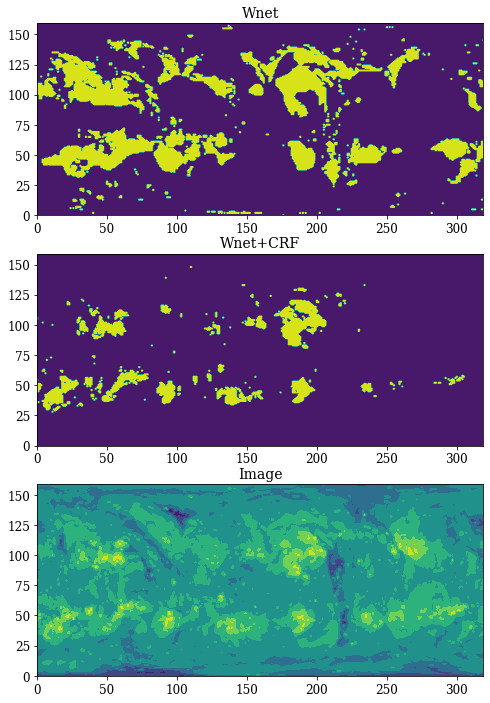

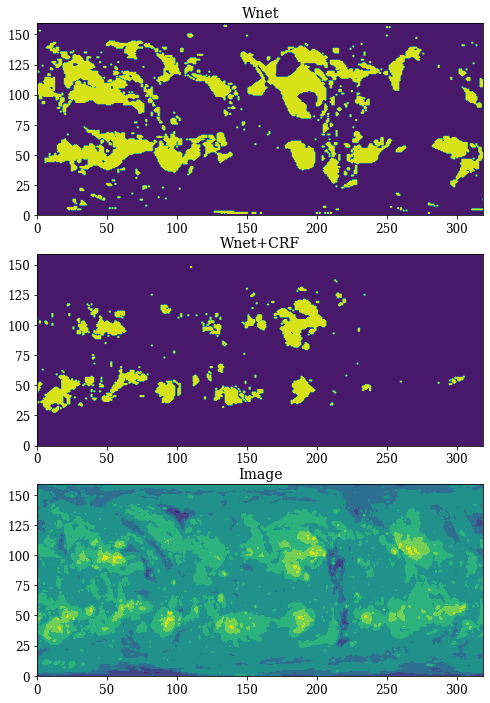

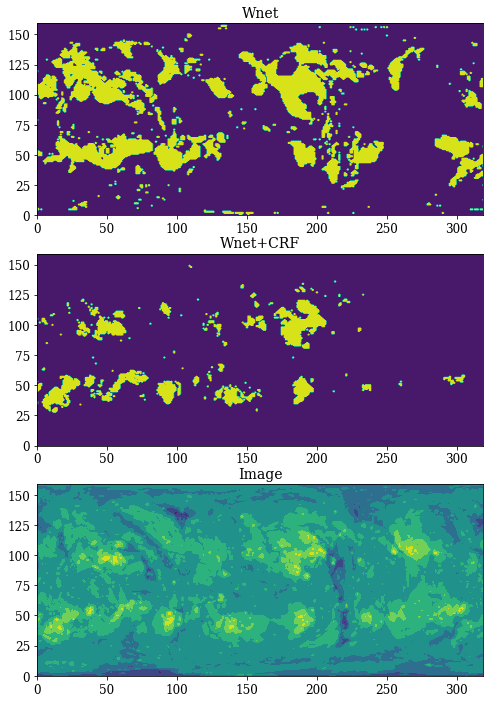

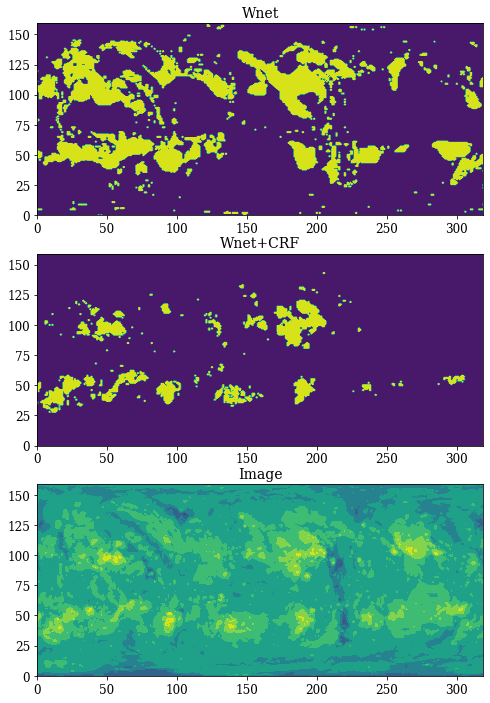

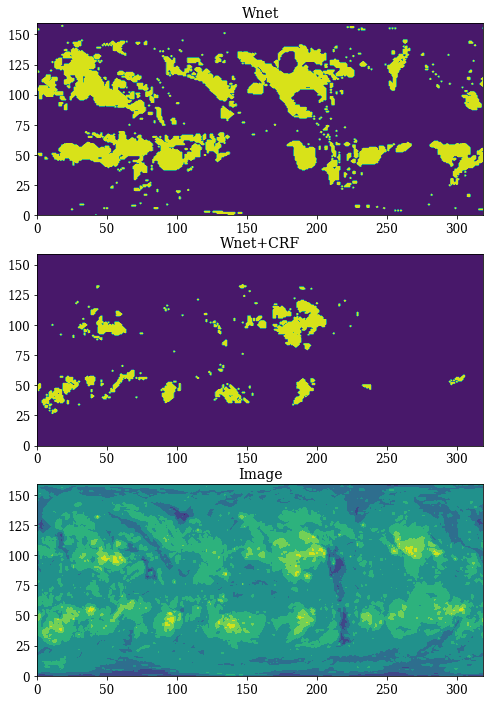

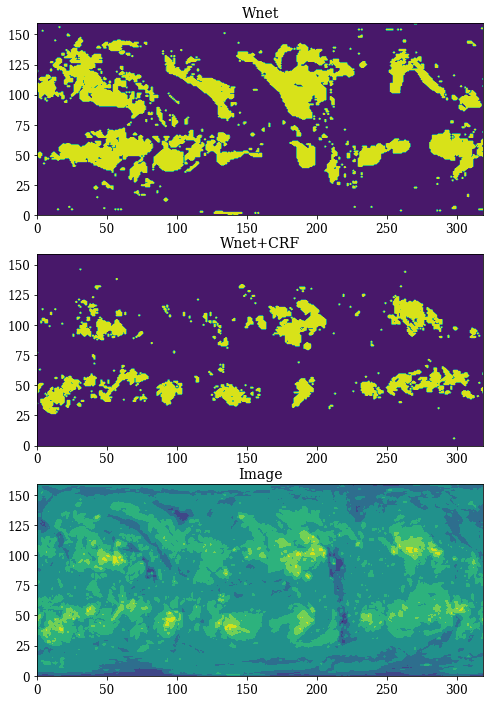

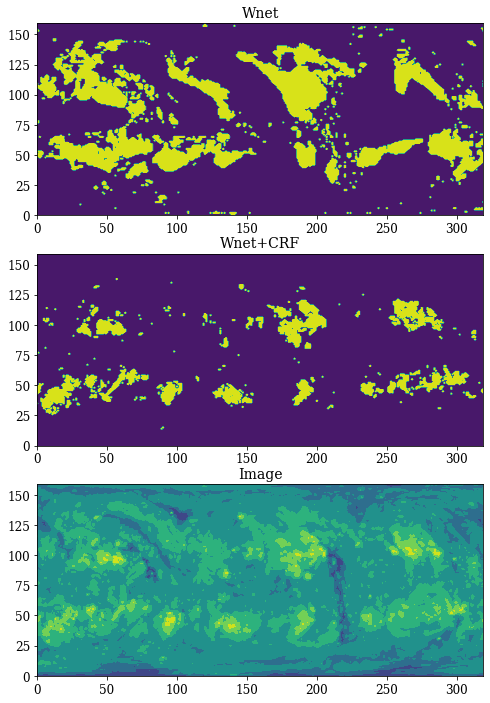

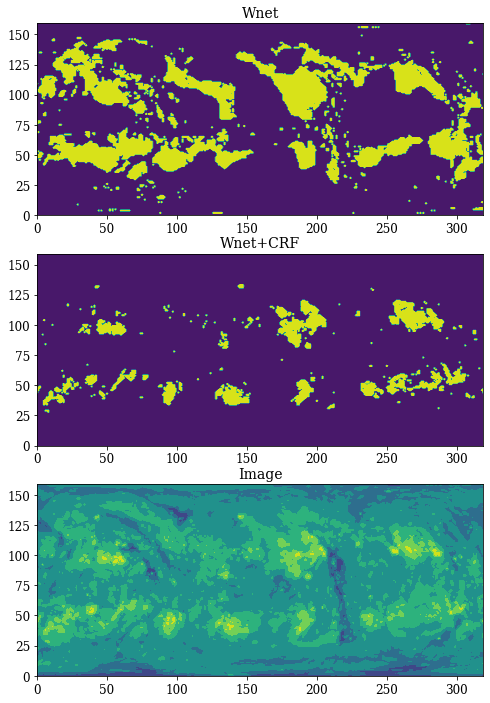

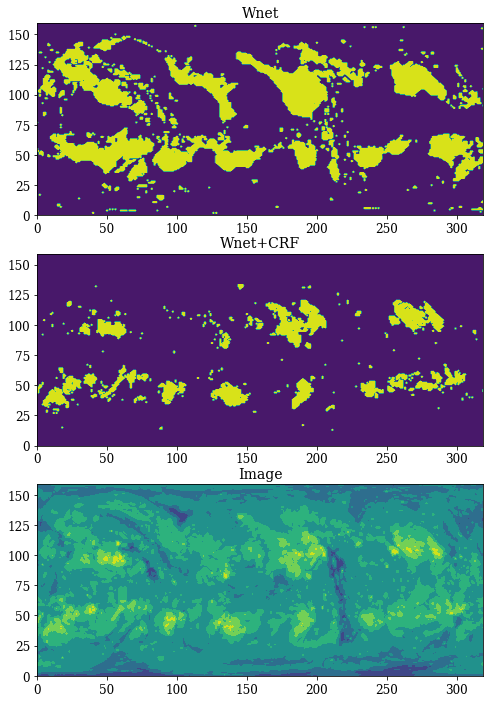

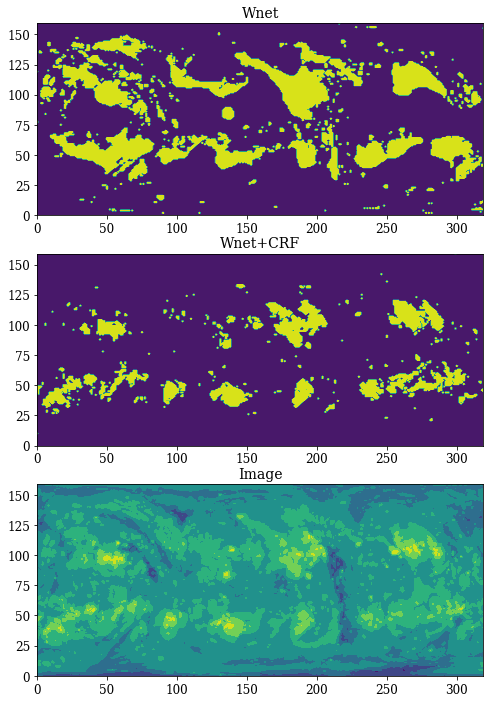

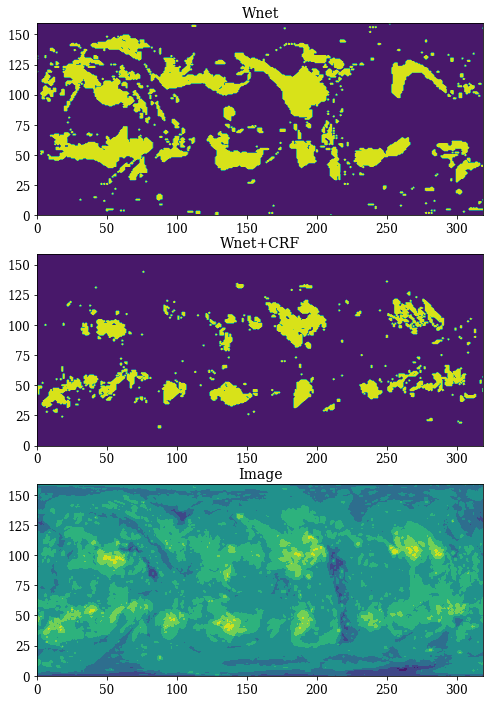

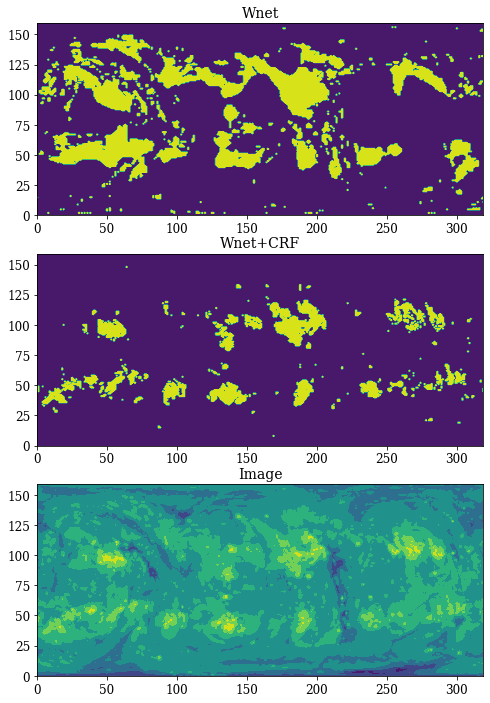

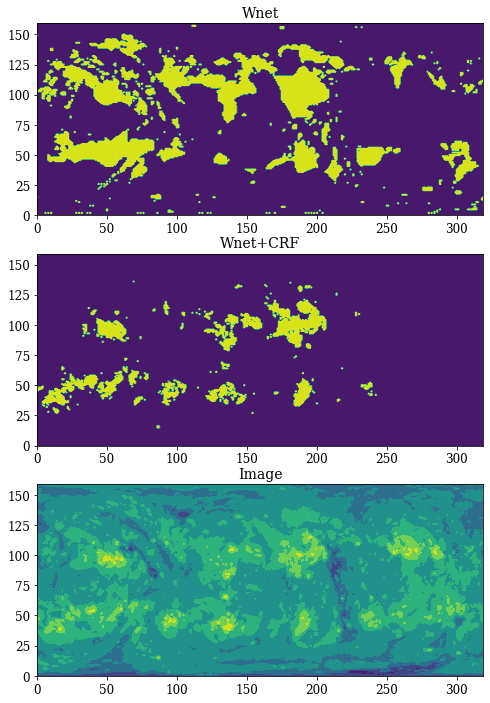

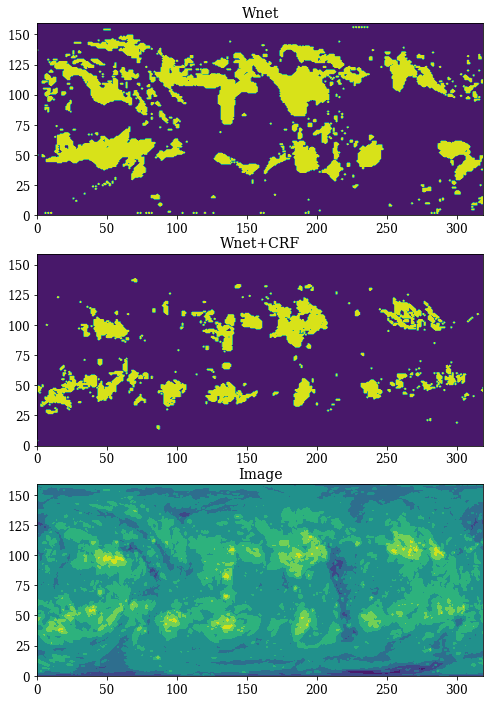

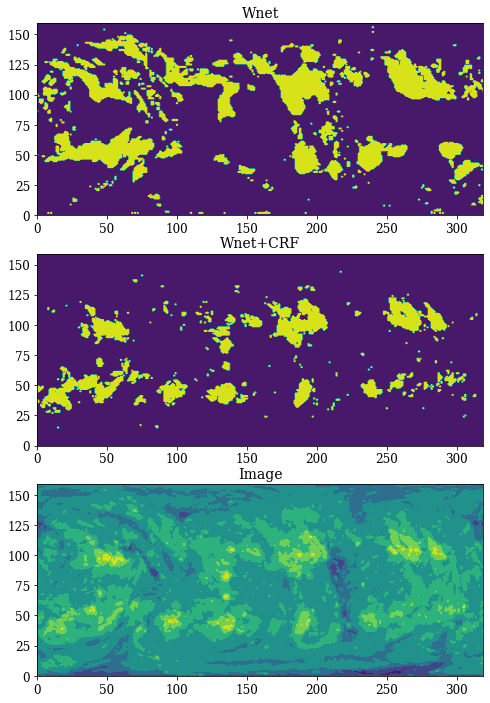

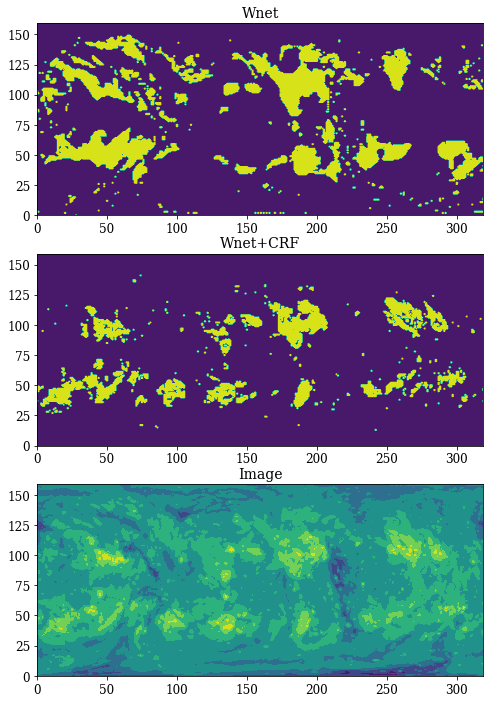

In [39]:
#### active regions comparison between Wnet and Wnet+CRF
%matplotlib inline

########### active regions ############

with h5py.File(pred_path, 'r') as f:
    
    image = np.array(f['origin'])
    Wnet = np.array(f['Wnet'])
    Wnet_CRF = np.array(f['Wnet+CRF'])
    f.close()
    
active_Wnet = np.array(Wnet)
active_Wnet_CRF = np.array(Wnet_CRF)
    
print('shape of pred', pred.shape)
#import ipdb; ipdb.set_trace()
idx_nonactive = np.where(Wnet != 12 )
active_Wnet[idx_nonactive] = 0
#import ipdb; ipdb.set_trace()
idx_nonch = np.where(Wnet_CRF != 12)
active_Wnet_CRF[idx_nonch] = 0

for i in range(active.shape[0]):
    #import ipdb; ipdb.set_trace()

    plt.figure(figsize=(8, 12))
    plt.subplot(3,1,1)
    plt.contourf(active_Wnet[i])
    plt.title('Wnet')
    plt.subplot(3,1,2)
    plt.contourf(active_Wnet_CRF[i])
    plt.title('Wnet+CRF')
    plt.subplot(3,1,3)
    plt.contourf(image[i, 0])
    plt.title('Image')
    #plt.colorbar()

    plt.show()
    name = 'Figs/Active_'+str(i+2560)+'.eps'
    plt.savefig(name, bbox_inches='tight',
                format='eps')

In [40]:
# IOU and Similarity of CHs

from skimage.metrics import structural_similarity as ssim

iou_score = np.zeros(pred.shape[0])
ssim_none = np.zeros(pred.shape[0])

print('between real CHs and CHs from Wnet,')
print('their IoUs and similarities are:\t')
for i in range(pred.shape[0]):
    # Intersection over Union calculation
    intersection = np.logical_and(pred[i], real[i])
    union = np.logical_or(pred[i], real[i])
    iou_score[i] = np.sum(intersection) / np.sum(union)
    ssim_none[i] = ssim(pred[i], real[i], 
                     data_range=real[i].max() - real[i].min()) 
    print('in Case', str(i+2560), 'IoU is %s' % iou_score[i])
    print('in Case', str(i+2560), 'similarity is %s' % ssim_none[i])
    
print('mean IoU of CH', iou_score.mean())
print('mean similarity of CH', ssim_none.mean())


between real CHs and CHs from Wnet,
their IoUs and similarities are:	
in Case 2560 IoU is 0.6399484536082474
in Case 2560 similarity is 0.8305768444083902
in Case 2561 IoU is 0.6416275430359938
in Case 2561 similarity is 0.8254372016073575
in Case 2562 IoU is 0.6566966649020646
in Case 2562 similarity is 0.8376318849062845
in Case 2563 IoU is 0.6050039925472451
in Case 2563 similarity is 0.8327880324349255
in Case 2564 IoU is 0.5687466948704389
in Case 2564 similarity is 0.822486567249853
in Case 2565 IoU is 0.5632395477254799
in Case 2565 similarity is 0.8169440244351738
in Case 2566 IoU is 0.5713228035538006
in Case 2566 similarity is 0.8074553314078154
in Case 2567 IoU is 0.550884388618303
in Case 2567 similarity is 0.8031976826069256
in Case 2568 IoU is 0.579226686884003
in Case 2568 similarity is 0.8033444408419298
in Case 2569 IoU is 0.5935352506999236
in Case 2569 similarity is 0.8157165134225326
in Case 2570 IoU is 0.591725768321513
in Case 2570 similarity is 0.7983081335676399